In [ ]:
# Author: Alexander Gebreamlak


In [52]:
import pandas as pd
import os
pwd = os.getcwd()
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import json
import requests
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [3]:
#Q1 Manually created this dataset using Census data from 2021 - https://www12.statcan.gc.ca/census-recensement/index-eng.cfm
# COVID-19 Case data by Public Health Unit is collected until June 4th 2024 - https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario/resource/455fd63b-603d-4608-8216-7d8647f43350
# COVID-19 Death data by Public Health Unit is collected until October 27th 2024 - https://www.publichealthontario.ca/en/Data-and-Analysis/Infectious-Disease/Respiratory-Virus-Tool
df = pd.read_excel(pwd + "/data/PHU_Data.xlsx")
df


,PHU_unit,PHU_Num,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force
0,Algoma,2226,112764,0.508,14202,128,29900,2.2,48040,876,0.034,49840
1,Brant,2227,144937,0.509,16083,171,27955,2.5,50040,1198,0.127,73555
2,Chatham-Kent,2224,104316,0.508,12246,159,24600,2.3,46640,894,0.064,49015
3,Durham,2230,696992,0.512,78487,625,111080,2.8,56750,1506,0.361,367505
4,Eastern Ontario,2258,210276,0.506,22714,340,46960,2.4,50480,978,0.052,104310
5,Grey-Bruce,2233,174301,0.506,13525,163,45735,2.3,55050,1047,0.040,82790
6,Haldimand-Norfolk,2234,116706,0.504,12357,150,27565,2.5,49480,1066,0.041,56295
7,Hamilton,2237,569353,0.509,79516,750,104290,2.5,53750,1233,0.248,290990
8,Halton,2236,596637,0.513,61686,520,95490,2.8,71600,1904,0.351,320175
9,Haliburton Kawartha Pr,2235,189183,0.505,14946,213,55620,2.3,51160,1157,0.037,86520


In [4]:
#Q2 Mapping housing, socio-economic, and demographic factors from dataset above to previous dataset created
df_A4 = pd.read_excel(pwd + "/data/A4_df.xlsx")
df_A4.head()

Q2_df = pd.merge(df, df_A4, on='PHU_Num', how='right') 

#Dropping duplicate column
Q2_df = Q2_df.drop(["PHU_unit"], axis=1)

Q2_df

,PHU_Num,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,...,Resident_death,Resident_deaths_per100beds,Had-outbreak_WAVE1,Local_incidence_WAVE1,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Had-outbreak_WAVE2,Local_incidence_WAVE2,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2
0,2246,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,...,1.0,0.4,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,1.0,0.4
1,3895,2794356.0,0.517,402323.0,5249.0,476985.0,2.4,62050.0,1562.0,0.550,...,41.0,16.5,YES,"High (300+ cases per 100,000 before Sept. 1, 2...",41.0,16.5,YES,High local incidence,0.0,0.0
2,2266,307283.0,0.508,29736.0,251.0,53515.0,2.6,57400.0,1354.0,0.170,...,0.0,0.0,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,0.0,0.0
3,2246,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,...,20.0,20.8,YES,"Medium (150-299 cases per 100,000 before Sept....",20.0,20.8,YES,Medium local incidence,0.0,0.0
4,2230,696992.0,0.512,78487.0,625.0,111080.0,2.8,56750.0,1506.0,0.361,...,17.0,17.0,YES,"Medium (150-299 cases per 100,000 before Sept....",17.0,17.0,YES,Medium local incidence,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,2233,174301.0,0.506,13525.0,163.0,45735.0,2.3,55050.0,1047.0,0.040,...,0.0,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0
522,4913,216533.0,0.506,20041.0,259.0,43740.0,2.4,55000.0,975.0,0.063,...,0.0,0.0,NO,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,0.0,0.0
523,2261,202431.0,0.506,24575.0,268.0,43255.0,2.3,53800.0,1023.0,0.056,...,0.0,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0
524,2249,77338.0,0.497,16338.0,85.0,14590.0,2.4,51160.0,939.0,0.025,...,0.0,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0


In [5]:
#Q3

# Calculate the mean COVID-19 death rate per 100 nursing home residents in Ontario
Mean_C19_Death_rate = (Q2_df['Resident_death'].sum() / Q2_df['Total_Beds'].sum()) * 100

# Add a new column to categorize each facility as 'A' (above) or 'B' (below) the mean COVID-19 death rate per 100 nursing home residents in Ontario
Q2_df['Death_Rate_Category'] = Q2_df.apply(lambda row: 'A' if (row['Resident_deaths_per100beds'] / row['Total_Beds']) * 100 > Mean_C19_Death_rate else 'B', axis=1)

Q3_df = Q2_df

Q3_df.head()

,PHU_Num,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,...,Resident_deaths_per100beds,Had-outbreak_WAVE1,Local_incidence_WAVE1,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Had-outbreak_WAVE2,Local_incidence_WAVE2,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2,Death_Rate_Category
0,2246,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,...,0.4,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,1.0,0.4,B
1,3895,2794356.0,0.517,402323.0,5249.0,476985.0,2.4,62050.0,1562.0,0.550,...,16.5,YES,"High (300+ cases per 100,000 before Sept. 1, 2...",41.0,16.5,YES,High local incidence,0.0,0.0,A
2,2266,307283.0,0.508,29736.0,251.0,53515.0,2.6,57400.0,1354.0,0.170,...,0.0,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
3,2246,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,...,20.8,YES,"Medium (150-299 cases per 100,000 before Sept....",20.0,20.8,YES,Medium local incidence,0.0,0.0,A
4,2230,696992.0,0.512,78487.0,625.0,111080.0,2.8,56750.0,1506.0,0.361,...,17.0,YES,"Medium (150-299 cases per 100,000 before Sept....",17.0,17.0,YES,Medium local incidence,0.0,0.0,A


In [6]:
#dropping unnecessary columns
Q4_df = Q3_df.drop(columns=['PHU_Num', 'LTC_Home'])
Q4_df

,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,...,Resident_deaths_per100beds,Had-outbreak_WAVE1,Local_incidence_WAVE1,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Had-outbreak_WAVE2,Local_incidence_WAVE2,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2,Death_Rate_Category
0,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,...,0.4,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,1.0,0.4,B
1,2794356.0,0.517,402323.0,5249.0,476985.0,2.4,62050.0,1562.0,0.550,1518420.0,...,16.5,YES,"High (300+ cases per 100,000 before Sept. 1, 2...",41.0,16.5,YES,High local incidence,0.0,0.0,A
2,307283.0,0.508,29736.0,251.0,53515.0,2.6,57400.0,1354.0,0.170,169205.0,...,0.0,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
3,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,...,20.8,YES,"Medium (150-299 cases per 100,000 before Sept....",20.0,20.8,YES,Medium local incidence,0.0,0.0,A
4,696992.0,0.512,78487.0,625.0,111080.0,2.8,56750.0,1506.0,0.361,367505.0,...,17.0,YES,"Medium (150-299 cases per 100,000 before Sept....",17.0,17.0,YES,Medium local incidence,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,174301.0,0.506,13525.0,163.0,45735.0,2.3,55050.0,1047.0,0.040,82790.0,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0,B
522,216533.0,0.506,20041.0,259.0,43740.0,2.4,55000.0,975.0,0.063,91500.0,...,0.0,NO,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
523,202431.0,0.506,24575.0,268.0,43255.0,2.3,53800.0,1023.0,0.056,99750.0,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0,B
524,77338.0,0.497,16338.0,85.0,14590.0,2.4,51160.0,939.0,0.025,36000.0,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0,B


In [7]:
missing_rows = Q4_df[Q4_df['THREE_BEDS'].isna()] #THREE-BEDS is just a way to see missing rows
missing_rows

,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,...,Resident_deaths_per100beds,Had-outbreak_WAVE1,Local_incidence_WAVE1,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Had-outbreak_WAVE2,Local_incidence_WAVE2,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2,Death_Rate_Category
8,189183.0,0.505,14946.0,213.0,55620.0,2.3,51160.0,1157.0,0.037,86520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
40,1017449.0,0.512,99057.0,1282.0,172150.0,2.5,64500.0,1422.0,0.319,549990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
103,1017449.0,0.512,99057.0,1282.0,172150.0,2.5,64500.0,1422.0,0.319,549990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
109,128154.0,0.507,15481.0,191.0,31455.0,2.3,54550.0,1051.0,0.056,59655.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
124,1017449.0,0.512,99057.0,1282.0,172150.0,2.5,64500.0,1422.0,0.319,549990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
281,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
293,569353.0,0.509,79516.0,750.0,104290.0,2.5,53750.0,1233.0,0.248,290990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
306,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
313,500563.0,0.510,52760.0,654.0,90625.0,2.4,51400.0,1205.0,0.244,256120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
366,202431.0,0.506,24575.0,268.0,43255.0,2.3,53800.0,1023.0,0.056,99750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [8]:
#20 rows (LTHC's) are void of any data from the previous assignment dataset, therefore they will be deleted as keeping them would result in problems when performing the analysis below.
Q4_df = Q4_df.dropna(subset=['THREE_BEDS'])
Q4_df

,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,...,Resident_deaths_per100beds,Had-outbreak_WAVE1,Local_incidence_WAVE1,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Had-outbreak_WAVE2,Local_incidence_WAVE2,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2,Death_Rate_Category
0,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,...,0.4,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,1.0,0.4,B
1,2794356.0,0.517,402323.0,5249.0,476985.0,2.4,62050.0,1562.0,0.550,1518420.0,...,16.5,YES,"High (300+ cases per 100,000 before Sept. 1, 2...",41.0,16.5,YES,High local incidence,0.0,0.0,A
2,307283.0,0.508,29736.0,251.0,53515.0,2.6,57400.0,1354.0,0.170,169205.0,...,0.0,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
3,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,...,20.8,YES,"Medium (150-299 cases per 100,000 before Sept....",20.0,20.8,YES,Medium local incidence,0.0,0.0,A
4,696992.0,0.512,78487.0,625.0,111080.0,2.8,56750.0,1506.0,0.361,367505.0,...,17.0,YES,"Medium (150-299 cases per 100,000 before Sept....",17.0,17.0,YES,Medium local incidence,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,174301.0,0.506,13525.0,163.0,45735.0,2.3,55050.0,1047.0,0.040,82790.0,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0,B
522,216533.0,0.506,20041.0,259.0,43740.0,2.4,55000.0,975.0,0.063,91500.0,...,0.0,NO,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
523,202431.0,0.506,24575.0,268.0,43255.0,2.3,53800.0,1023.0,0.056,99750.0,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0,B
524,77338.0,0.497,16338.0,85.0,14590.0,2.4,51160.0,939.0,0.025,36000.0,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0,B


In [9]:
missing_rows_2 = Q4_df[Q4_df['Population_Over_65'].isna()] 
missing_rows_2

#Appear to have 11 rows from the previous assignment that are not found in the census & PHO data. I will manually add the data as its a very small amount.

,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,...,Resident_deaths_per100beds,Had-outbreak_WAVE1,Local_incidence_WAVE1,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Had-outbreak_WAVE2,Local_incidence_WAVE2,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2,Death_Rate_Category
324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NO,"High (300+ cases per 100,000 before Sept. 1, 2...",0.0,0.0,YES,Medium local incidence,1.0,1.0,B
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NO,"High (300+ cases per 100,000 before Sept. 1, 2...",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,YES,"High (300+ cases per 100,000 before Sept. 1, 2...",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,YES,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Medium local incidence,0.0,0.0,B
458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Medium local incidence,0.0,0.0,B
462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NO,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,NO,Medium local incidence,0.0,0.0,B
483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0,B


In [10]:
# Here the 11 missing rows will be filled, and the 20 rows missing data from the previous assignment will be removed (lsitwise deletion)
columns_to_correct = [
    "Population", "Female_Proportion", "Total_Covid-19_Cases", 
    "Total_Covid-19_Deaths", "Population_Over_65", 
    "Avg_Household_Size", "Per_Capita_Income_Among_Recipients", 
    "Avg_Gross_Rent_For_Renter_Occupied_Dwellings", 
    "Visible_Minority_Proportion", "In_Labour_Force"
]

# Function to fill missing data from rows with the same Health Unit
def fill_missing_from_same_health_unit(group):
    for col in columns_to_correct:
        if group[col].isna().any():
            # Fill missing values using the first available non-missing value in the group
            group[col] = group[col].fillna(method='ffill').fillna(method='bfill')
    return group

# Apply the function grouped by 'Health_unit'
Q4_df_imputed = Q4_df.groupby('Health_unit', group_keys=False).apply(fill_missing_from_same_health_unit)
Q4_df = Q4_df_imputed.reset_index(drop=True)

Q4_df


,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,...,Resident_deaths_per100beds,Had-outbreak_WAVE1,Local_incidence_WAVE1,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Had-outbreak_WAVE2,Local_incidence_WAVE2,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2,Death_Rate_Category
0,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,...,0.4,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,1.0,0.4,B
1,2794356.0,0.517,402323.0,5249.0,476985.0,2.4,62050.0,1562.0,0.550,1518420.0,...,16.5,YES,"High (300+ cases per 100,000 before Sept. 1, 2...",41.0,16.5,YES,High local incidence,0.0,0.0,A
2,307283.0,0.508,29736.0,251.0,53515.0,2.6,57400.0,1354.0,0.170,169205.0,...,0.0,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
3,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,...,20.8,YES,"Medium (150-299 cases per 100,000 before Sept....",20.0,20.8,YES,Medium local incidence,0.0,0.0,A
4,696992.0,0.512,78487.0,625.0,111080.0,2.8,56750.0,1506.0,0.361,367505.0,...,17.0,YES,"Medium (150-299 cases per 100,000 before Sept....",17.0,17.0,YES,Medium local incidence,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,174301.0,0.506,13525.0,163.0,45735.0,2.3,55050.0,1047.0,0.040,82790.0,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0,B
502,216533.0,0.506,20041.0,259.0,43740.0,2.4,55000.0,975.0,0.063,91500.0,...,0.0,NO,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
503,202431.0,0.506,24575.0,268.0,43255.0,2.3,53800.0,1023.0,0.056,99750.0,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0,B
504,77338.0,0.497,16338.0,85.0,14590.0,2.4,51160.0,939.0,0.025,36000.0,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0,B


In [11]:
#data manipulation for compliance/inspection columns & converting to numeric
columns_zero_to_nan = ['SSI_2019', 'IPAC_2019', 'OAT_2019', 'SSI_2020', 'IPAC_2020', 'OAT_2020']

# Convert columns to numeric and replace 0 with NaN
for column in columns_zero_to_nan:
    Q4_df[column] = pd.to_numeric(Q4_df[column], errors='coerce').replace(0, np.nan)

# List of columns to process for "NI" -> NaN
columns_ni_to_nan = [
    'SSI_NC_2019', 'IPAC_NC_2019', 'OAT_NC_2019', 
    'SSI_NC_2020', 'IPAC_NC_2020_COVID', 'IPAC_NC_2020', 
    'OAT_NC_2020_COVID', 'OAT_NC_2020'
]

# Convert columns to numeric and replace "NI" with NaN
for column in columns_ni_to_nan:
    Q4_df[column] = pd.to_numeric(Q4_df[column].replace("NI", np.nan), errors='coerce')


In [12]:
Q4_missing = Q4_df.isna().sum() / len(Q4_df) * 100 
#handled missingness in all columns except compliance/inspection related columns.
print(Q4_missing.to_string())

Population                                       0.000000
Female_Proportion                                0.000000
Total_Covid-19_Cases                             0.000000
Total_Covid-19_Deaths                            0.000000
Population_Over_65                               0.000000
Avg_Household_Size                               0.000000
Per_Capita_Income_Among_Recipients               0.000000
Avg_Gross_Rent_For_Renter_Occupied_Dwellings     0.000000
Visible_Minority_Proportion                      0.000000
In_Labour_Force                                  0.000000
First_Case_Num_Days                              0.000000
First_Death_Num_Days                             0.000000
PRIV_BEDS                                        0.000000
SEMI_BEDS                                        0.000000
THREE_BEDS                                       0.000000
BASIC_BEDS                                       0.000000
CONCARE_BED                                      0.000000
RES_BED       

In [13]:
#Dropping 9 columns due to excess missingness > 75%. This decision was made arbitrability and can easily be changed to 25%, 50%, 80%, etc. The only reason I chose 75% is because I did not want to delete ALL the data from the compliance/inspection variables.
Q4_df = Q4_df.drop(columns=['IPAC_2019', 'IPAC_NC_2019', 'OAT_2019', 'OAT_NC_2019', 'SSI_2020', 'SSI_NC_2020', 'OAT_2020', 'OAT_NC_2020_COVID', 'OAT_NC_2020'])
Q4_df

,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,...,Resident_deaths_per100beds,Had-outbreak_WAVE1,Local_incidence_WAVE1,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Had-outbreak_WAVE2,Local_incidence_WAVE2,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2,Death_Rate_Category
0,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,...,0.4,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,1.0,0.4,B
1,2794356.0,0.517,402323.0,5249.0,476985.0,2.4,62050.0,1562.0,0.550,1518420.0,...,16.5,YES,"High (300+ cases per 100,000 before Sept. 1, 2...",41.0,16.5,YES,High local incidence,0.0,0.0,A
2,307283.0,0.508,29736.0,251.0,53515.0,2.6,57400.0,1354.0,0.170,169205.0,...,0.0,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
3,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,...,20.8,YES,"Medium (150-299 cases per 100,000 before Sept....",20.0,20.8,YES,Medium local incidence,0.0,0.0,A
4,696992.0,0.512,78487.0,625.0,111080.0,2.8,56750.0,1506.0,0.361,367505.0,...,17.0,YES,"Medium (150-299 cases per 100,000 before Sept....",17.0,17.0,YES,Medium local incidence,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,174301.0,0.506,13525.0,163.0,45735.0,2.3,55050.0,1047.0,0.040,82790.0,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0,B
502,216533.0,0.506,20041.0,259.0,43740.0,2.4,55000.0,975.0,0.063,91500.0,...,0.0,NO,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
503,202431.0,0.506,24575.0,268.0,43255.0,2.3,53800.0,1023.0,0.056,99750.0,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0,B
504,77338.0,0.497,16338.0,85.0,14590.0,2.4,51160.0,939.0,0.025,36000.0,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0,B


In [14]:
Q4_missing = Q4_df.isna().sum() / len(Q4_df) * 100 
#only 5 columns remain with missingness.
print(Q4_missing.to_string())

Population                                       0.000000
Female_Proportion                                0.000000
Total_Covid-19_Cases                             0.000000
Total_Covid-19_Deaths                            0.000000
Population_Over_65                               0.000000
Avg_Household_Size                               0.000000
Per_Capita_Income_Among_Recipients               0.000000
Avg_Gross_Rent_For_Renter_Occupied_Dwellings     0.000000
Visible_Minority_Proportion                      0.000000
In_Labour_Force                                  0.000000
First_Case_Num_Days                              0.000000
First_Death_Num_Days                             0.000000
PRIV_BEDS                                        0.000000
SEMI_BEDS                                        0.000000
THREE_BEDS                                       0.000000
BASIC_BEDS                                       0.000000
CONCARE_BED                                      0.000000
RES_BED       

In [15]:
from sklearn.impute import KNNImputer

columns_to_impute = [
    "SSI_2019", "SSI_NC_2019", "IPAC_2020", 
    "IPAC_NC_2020_COVID", "IPAC_NC_2020"
]

knn_imputer = KNNImputer(n_neighbors=5)
Q4_df[columns_to_impute] = knn_imputer.fit_transform(Q4_df[columns_to_impute])

Q4_df

#chose KNNImputer because I thought it choosing closer/distance based imputation seemed logical.

,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,...,Resident_deaths_per100beds,Had-outbreak_WAVE1,Local_incidence_WAVE1,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Had-outbreak_WAVE2,Local_incidence_WAVE2,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2,Death_Rate_Category
0,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,...,0.4,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,1.0,0.4,B
1,2794356.0,0.517,402323.0,5249.0,476985.0,2.4,62050.0,1562.0,0.550,1518420.0,...,16.5,YES,"High (300+ cases per 100,000 before Sept. 1, 2...",41.0,16.5,YES,High local incidence,0.0,0.0,A
2,307283.0,0.508,29736.0,251.0,53515.0,2.6,57400.0,1354.0,0.170,169205.0,...,0.0,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
3,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,...,20.8,YES,"Medium (150-299 cases per 100,000 before Sept....",20.0,20.8,YES,Medium local incidence,0.0,0.0,A
4,696992.0,0.512,78487.0,625.0,111080.0,2.8,56750.0,1506.0,0.361,367505.0,...,17.0,YES,"Medium (150-299 cases per 100,000 before Sept....",17.0,17.0,YES,Medium local incidence,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,174301.0,0.506,13525.0,163.0,45735.0,2.3,55050.0,1047.0,0.040,82790.0,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0,B
502,216533.0,0.506,20041.0,259.0,43740.0,2.4,55000.0,975.0,0.063,91500.0,...,0.0,NO,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
503,202431.0,0.506,24575.0,268.0,43255.0,2.3,53800.0,1023.0,0.056,99750.0,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0,B
504,77338.0,0.497,16338.0,85.0,14590.0,2.4,51160.0,939.0,0.025,36000.0,...,0.0,NO,"Low (<150 cases per 100,000 before Sept. 1, 2020)",0.0,0.0,NO,Low local incidence,0.0,0.0,B


In [16]:
Q4_missing = Q4_df.isna().sum() / len(Q4_df) * 100 
# handled all the missingness in the dataset
print(Q4_missing.to_string())

Population                                      0.0
Female_Proportion                               0.0
Total_Covid-19_Cases                            0.0
Total_Covid-19_Deaths                           0.0
Population_Over_65                              0.0
Avg_Household_Size                              0.0
Per_Capita_Income_Among_Recipients              0.0
Avg_Gross_Rent_For_Renter_Occupied_Dwellings    0.0
Visible_Minority_Proportion                     0.0
In_Labour_Force                                 0.0
First_Case_Num_Days                             0.0
First_Death_Num_Days                            0.0
PRIV_BEDS                                       0.0
SEMI_BEDS                                       0.0
THREE_BEDS                                      0.0
BASIC_BEDS                                      0.0
CONCARE_BED                                     0.0
RES_BED                                         0.0
INT_BED                                         0.0
ACCREDITATIO

In [17]:
Q4_df_non_numerical_columns = Q4_df.select_dtypes(exclude=['number']).columns
Q4_df_non_numerical_columns

Index(['Ownership_type', 'APRV_SS_BEDS', 'LTCH_SIZE', 'LTC_LOC',
       'Chain_ownership', 'Design', 'LHIN', 'City', 'Health_unit', 'Licensee',
       'Management_firm', 'Had_outbreak', 'Local_incidence',
       'Had-outbreak_WAVE1', 'Local_incidence_WAVE1', 'Had-outbreak_WAVE2',
       'Local_incidence_WAVE2', 'Death_Rate_Category'],
      dtype='object')

In [18]:
#Label Encoding for Ordinal Variables
ordinal_mapping_1 = {'Small': 1, 'Medium': 2, 'Large': 3}
Q4_df['LTCH_SIZE_Factor'] = Q4_df.pop('LTCH_SIZE').map(ordinal_mapping_1)

ordinal_mapping_2 = {'Low (<1,000 cases per 100,000)': 1, 'Medium (1,000 - 2,000 cases per 100,000)': 2, 'High (2,000+ cases per 100,000)': 3}
Q4_df['Local_incidence_Factor'] = Q4_df.pop('Local_incidence').map(ordinal_mapping_2)

ordinal_mapping_3 = {'Low (<150 cases per 100,000 before Sept. 1, 2020)': 1, 'Medium (150-299 cases per 100,000 before Sept. 1, 2020)': 2, 'High (300+ cases per 100,000 before Sept. 1, 2020)': 3}
Q4_df['Local_incidence_WAVE1_Factor'] = Q4_df.pop('Local_incidence_WAVE1').map(ordinal_mapping_3)

ordinal_mapping = {'Low local incidence': 1, 'Medium local incidence': 2, 'High local incidence': 3}
Q4_df['Local_incidence_WAVE2_Factor'] = Q4_df.pop('Local_incidence_WAVE2').map(ordinal_mapping)

In [19]:
Q4_df

,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,...,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Had-outbreak_WAVE2,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2,Death_Rate_Category,LTCH_SIZE_Factor,Local_incidence_Factor,Local_incidence_WAVE1_Factor,Local_incidence_WAVE2_Factor
0,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,...,0.0,0.0,YES,1.0,0.4,B,3,2,2,2
1,2794356.0,0.517,402323.0,5249.0,476985.0,2.4,62050.0,1562.0,0.550,1518420.0,...,41.0,16.5,YES,0.0,0.0,A,3,3,3,3
2,307283.0,0.508,29736.0,251.0,53515.0,2.6,57400.0,1354.0,0.170,169205.0,...,0.0,0.0,YES,0.0,0.0,B,2,2,2,2
3,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,...,20.0,20.8,YES,0.0,0.0,A,2,2,2,2
4,696992.0,0.512,78487.0,625.0,111080.0,2.8,56750.0,1506.0,0.361,367505.0,...,17.0,17.0,YES,0.0,0.0,A,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,174301.0,0.506,13525.0,163.0,45735.0,2.3,55050.0,1047.0,0.040,82790.0,...,0.0,0.0,NO,0.0,0.0,B,2,1,1,1
502,216533.0,0.506,20041.0,259.0,43740.0,2.4,55000.0,975.0,0.063,91500.0,...,0.0,0.0,YES,0.0,0.0,B,2,2,2,2
503,202431.0,0.506,24575.0,268.0,43255.0,2.3,53800.0,1023.0,0.056,99750.0,...,0.0,0.0,NO,0.0,0.0,B,1,1,1,1
504,77338.0,0.497,16338.0,85.0,14590.0,2.4,51160.0,939.0,0.025,36000.0,...,0.0,0.0,NO,0.0,0.0,B,1,1,1,1


In [20]:
# Converting nominal categorical variables to One-Hot Encoding
columns_to_one_hot_encode = [
    'Ownership_type', 'APRV_SS_BEDS', 'LTC_LOC', 'Chain_ownership',
    'Design', 'LHIN', 'City', 'Health_unit', 'Licensee', 'Management_firm',
    'Had_outbreak', 'Had-outbreak_WAVE1', 'Had-outbreak_WAVE2', 'Death_Rate_Category'
]

# Apply one-hot encoding to the specified columns
Q4_df = pd.get_dummies(Q4_df, columns=columns_to_one_hot_encode, drop_first=True)


In [21]:
Q4_df_non_numerical_columns = Q4_df.select_dtypes(exclude=['number']).columns
Q4_df_non_numerical_columns

#All predictors can now be used for the classification models

Index([], dtype='object')

In [22]:
Q4_missing = Q4_df.isna().sum() / len(Q4_df) * 100 
print(Q4_missing.to_string())

#Again no missingness in the dataset

Population                                                                         0.0
Female_Proportion                                                                  0.0
Total_Covid-19_Cases                                                               0.0
Total_Covid-19_Deaths                                                              0.0
Population_Over_65                                                                 0.0
Avg_Household_Size                                                                 0.0
Per_Capita_Income_Among_Recipients                                                 0.0
Avg_Gross_Rent_For_Renter_Occupied_Dwellings                                       0.0
Visible_Minority_Proportion                                                        0.0
In_Labour_Force                                                                    0.0
First_Case_Num_Days                                                                0.0
First_Death_Num_Days                       

In [23]:
# Select only the continuous columns for centering and standardizing
continuous_cols = Q4_df.select_dtypes(include=['float64', 'int64'])

# Centering and standardizing: subtract the mean and divide by the standard deviation
Q4_df_centered_standardized = (continuous_cols - continuous_cols.mean()) / continuous_cols.std()

# Replace the original numerical columns with the centered and standardized versions
Q4_df[continuous_cols.columns] = Q4_df_centered_standardized

Q4_df

,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,...,Management_firm_Southrim Development Inc.,Management_firm_Specialty Care Inc.,Management_firm_Taminagi Inc. (As Manager),Management_firm_The Ottawa Hospital,Management_firm_Universalcare Canada Inc.,Management_firm_Winchester District Memorial Hospital,Had_outbreak_YES,Had-outbreak_WAVE1_YES,Had-outbreak_WAVE2_YES,Death_Rate_Category_B
0,-0.442839,0.760376,-0.442770,-0.354914,-0.286658,-0.480201,-1.036350,-0.504788,-0.642223,-0.471258,...,0,0,0,0,0,0,1,1,1,1
1,2.092442,1.576389,2.112881,2.200089,2.128046,-0.480201,1.191330,0.856616,1.337053,2.093484,...,0,0,0,0,0,0,1,1,1,0
2,-0.629622,-0.259641,-0.637678,-0.640824,-0.668570,0.344865,0.375041,0.103499,-0.457995,-0.599708,...,0,0,0,0,0,0,1,1,1,1
3,-0.442839,0.760376,-0.442770,-0.354914,-0.286658,-0.480201,-1.036350,-0.504788,-0.642223,-0.471258,...,0,0,0,0,0,0,1,1,1,0
4,-0.203091,0.556373,-0.277782,-0.428238,-0.288408,1.169931,0.260936,0.653854,0.444253,-0.203878,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.775169,-0.667647,-0.757353,-0.690844,-0.719949,-0.892734,-0.037493,-1.008073,-1.072090,-0.772203,...,0,0,0,0,0,0,0,0,0,1
502,-0.728946,-0.667647,-0.709250,-0.636276,-0.733124,-0.480201,-0.046270,-1.268767,-0.963442,-0.754817,...,0,0,0,0,0,0,1,0,1,1
503,-0.744381,-0.667647,-0.675778,-0.631161,-0.736327,-0.892734,-0.256925,-1.094971,-0.996509,-0.738349,...,0,0,0,0,0,0,0,0,0,1
504,-0.881293,-2.503677,-0.736587,-0.735180,-0.925632,-0.480201,-0.720367,-1.399114,-1.142947,-0.865601,...,0,0,0,0,0,0,0,0,0,1


In [24]:
x = Q4_df.drop(["Death_Rate_Category_B"], axis=1)
# Keep only numerical columns
x = Q4_df.select_dtypes(include=['float64', 'int64'])
x = x.fillna(x.interpolate(method='linear'))

y = Q4_df['Death_Rate_Category_B']


In [25]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)

In [26]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


In [27]:
target_names = ['Above Mean', 'Below Mean']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

  Above Mean       0.93      0.97      0.95        29
  Below Mean       0.99      0.98      0.98        98

    accuracy                           0.98       127
   macro avg       0.96      0.97      0.97       127
weighted avg       0.98      0.98      0.98       127



In [28]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)

In [29]:
#Fitting and Evaluating the Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred = knn.predict(X_test)

In [31]:
print(y_train.unique())

[1 0]


Text(0.5, 1.0, 'Accuracy Score: 0.968503937007874')

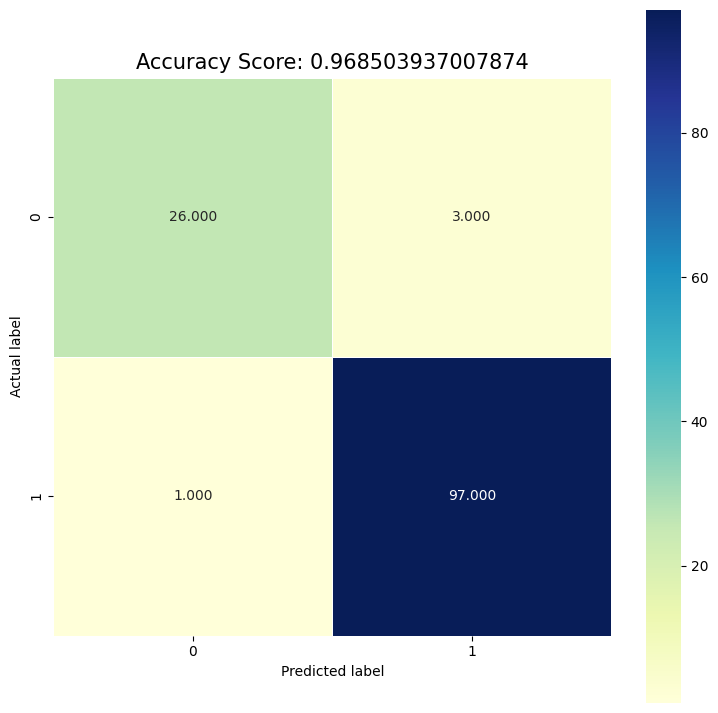

In [32]:
# Predict Output
cm = metrics.confusion_matrix(y_test, knn.predict(X_test))
score = knn.score(X_test, y_test)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='YlGnBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)

In [33]:
target_names = ['Above Mean', 'Below Mean']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

  Above Mean       0.96      0.90      0.93        29
  Below Mean       0.97      0.99      0.98        98

    accuracy                           0.97       127
   macro avg       0.97      0.94      0.95       127
weighted avg       0.97      0.97      0.97       127



In [34]:
#Using Cross Validation to Get the Best Value of k
k_values = [i for i in range(1, 10)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))


Text(0, 0.5, 'Accuracy Score')

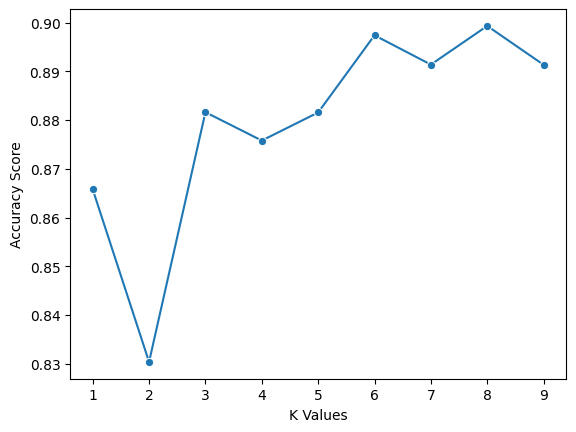

In [35]:
sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

#After fine-tuning the hyperparameter, it appeared that 3 was adequate.

In [36]:
# Create a Gaussian Classifier
naivebayes = GaussianNB()

# Train the model using the training sets
naivebayes.fit(x, y)

# Train the model using the training sets
naivebayes.fit(X_train, y_train)


GaussianNB()

In [37]:
y_pred = naivebayes.predict(X_test)

In [38]:
print(y_train.unique())

[1 0]


Text(0.5, 1.0, 'Accuracy Score: 0.8818897637795275')

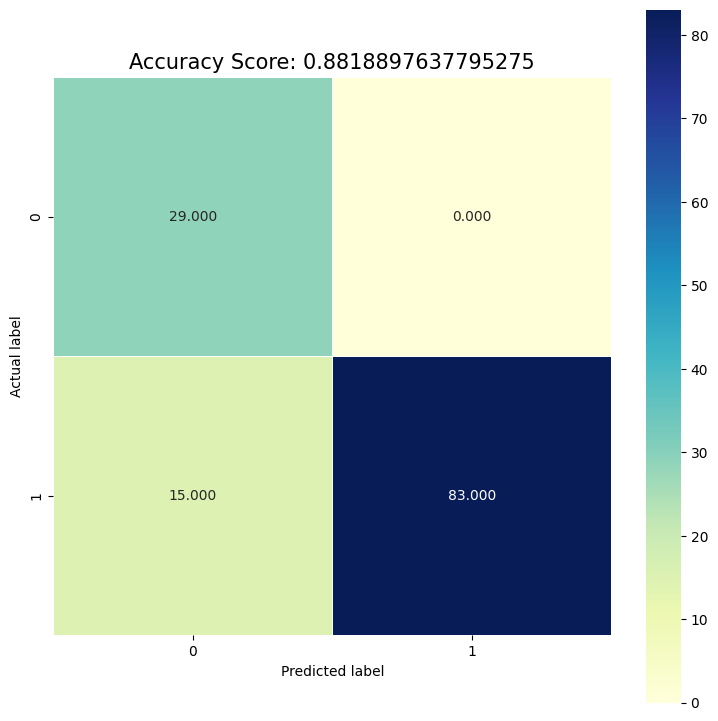

In [39]:
# Predict Output
cm = metrics.confusion_matrix(y_test, naivebayes.predict(X_test))
score = naivebayes.score(X_test, y_test)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='YlGnBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)

In [40]:
target_names = ['Above Mean', 'Below Mean']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

  Above Mean       0.66      1.00      0.79        29
  Below Mean       1.00      0.85      0.92        98

    accuracy                           0.88       127
   macro avg       0.83      0.92      0.86       127
weighted avg       0.92      0.88      0.89       127



In [41]:
#Worst accuracy (about 10% lower) in comparison to logistic regression and KNN. 

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#Train the Decision Tree Model
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [62]:
#Step 3: Make Predictions and Evaluate Initial Model
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.952755905511811
Confusion Matrix:
 [[29  2]
 [ 4 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.98      0.96      0.97        96

    accuracy                           0.95       127
   macro avg       0.93      0.95      0.94       127
weighted avg       0.95      0.95      0.95       127



Text(0.5, 427.9555555555555, 'Predicted label')

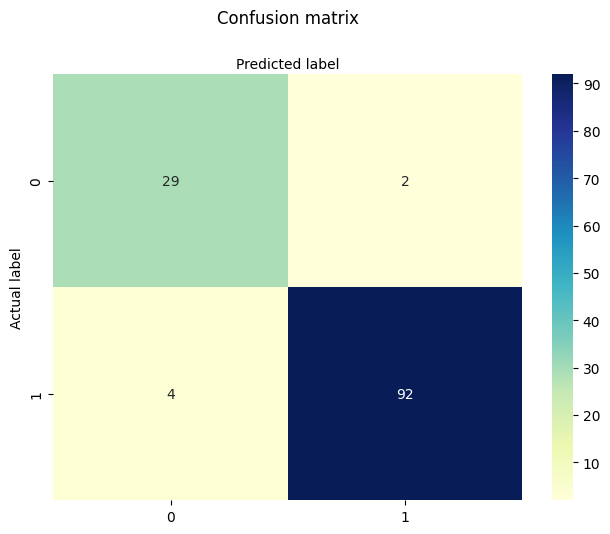

In [ ]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


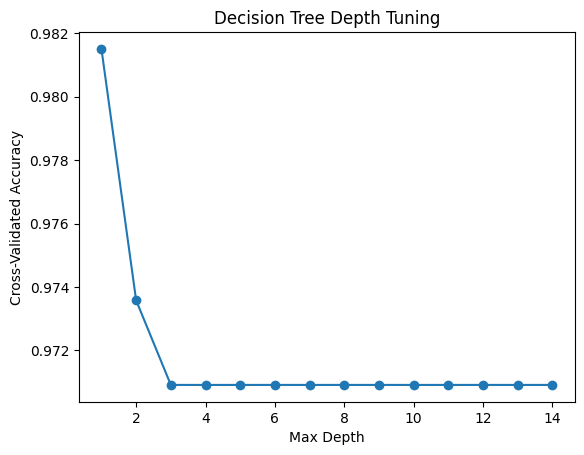

Optimal Depth: 1


In [72]:
#Step 4: Optimize Model Using Cross-Validation and Depth Tuning
# Initialize lists to store accuracy scores for each depth value
depth_range = range(1, 15)
cv_scores = []

# Loop through different values for max_depth
for depth in depth_range:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot the cross-validation accuracy scores
plt.plot(depth_range, cv_scores, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Decision Tree Depth Tuning")
plt.show()

# Choose the optimal max_depth based on the highest cross-validation score
optimal_depth = depth_range[np.argmax(cv_scores)]
print("Optimal Depth:", optimal_depth)


In [ ]:
#Step 5: Refit Model with Optimal Parameters and Final Evaluation
# Refit the model using the optimal depth
final_dt_model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
final_dt_model.fit(X_train, y_train)

# Predict on test data
final_y_pred = final_dt_model.predict(X_test)

# Final evaluation
final_accuracy = accuracy_score(y_test, final_y_pred)
final_conf_matrix = confusion_matrix(y_test, final_y_pred)
final_class_report = classification_report(y_test, final_y_pred)

print("Final Accuracy:", final_accuracy)
print("Final Confusion Matrix:\n", final_conf_matrix)
print("Final Classification Report:\n", final_class_report)

#Accuracy doesnt change, still 95%

Final Accuracy: 0.952755905511811
Final Confusion Matrix:
 [[29  2]
 [ 4 92]]
Final Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.98      0.96      0.97        96

    accuracy                           0.95       127
   macro avg       0.93      0.95      0.94       127
weighted avg       0.95      0.95      0.95       127



In [90]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
y_pred = rf_model.predict(X_test)

# Evaluate the model
Accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Final Accuracy:", Accuracy)
print("Final Confusion Matrix:\n", conf_matrix)
print("Final Classification Report:\n", class_report)


Final Accuracy: 0.952755905511811
Final Confusion Matrix:
 [[29  2]
 [ 4 92]]
Final Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.98      0.96      0.97        96

    accuracy                           0.95       127
   macro avg       0.93      0.95      0.94       127
weighted avg       0.95      0.95      0.95       127



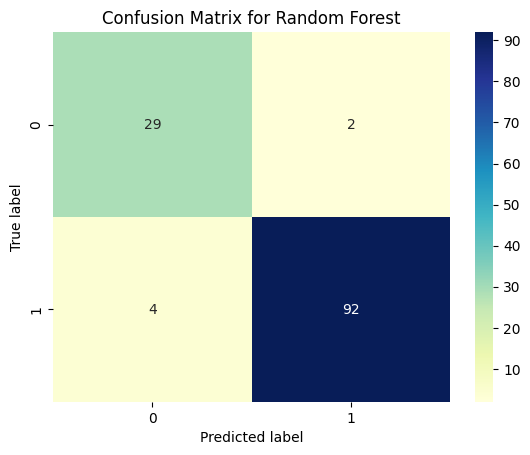

In [92]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", ax=ax)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix for Random Forest')
plt.show()

In [ ]:
#Model tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train model with optimal parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)


Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [96]:
# Make predictions with the optimized model
y_pred_optimized = best_rf_model.predict(X_test)

# Evaluate the optimized model
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))

Optimized Accuracy: 0.952755905511811


In [106]:
#K-Means Clustering

x = Q4_df.drop(["Death_Rate_Category_B"], axis=1)
# Keep only numerical columns
x = Q4_df.select_dtypes(include=['float64'])
x = x.fillna(x.interpolate(method='linear'))

y = Q4_df['Death_Rate_Category_B']

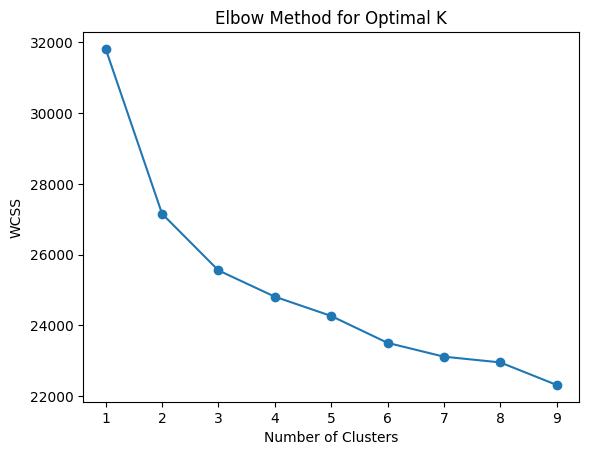

Optimal number of clusters: 8


In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize WCSS list to store Within-Cluster Sum of Squares
WCSS = []

# Calculate WCSS for each k value from 1 to 10
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)  
    WCSS.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.plot(range(1, 10), WCSS, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Calculate the optimal number of clusters (elbow point)
diffs = np.diff(WCSS)  
second_diffs = np.diff(diffs)  

# Find the index where the second difference is lowest, indicating the elbow point
optimal_k = np.argmin(second_diffs) + 2  
print("Optimal number of clusters:", optimal_k)


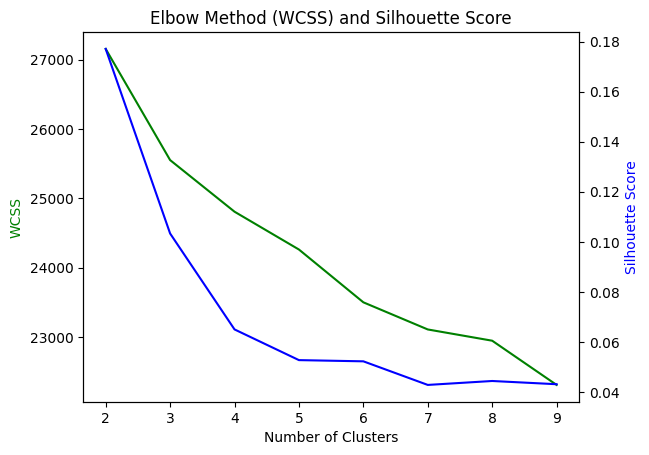

Optimal number of clusters based on silhouette score: 2


In [108]:
WCSS = []
silhouette_scores = []

# Calculate WCSS and Silhouette Score for each k
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x, kmeans.labels_))

# Plot WCSS and Silhouette Score side by side
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(range(2, 10), WCSS, 'g-')
ax2.plot(range(2, 10), silhouette_scores, 'b-')

ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS', color='g')
ax2.set_ylabel('Silhouette Score', color='b')
plt.title("Elbow Method (WCSS) and Silhouette Score")
plt.show()

# Find the optimal number of clusters based on Silhouette Score
optimal_k = np.argmax(silhouette_scores) + 2  # Adjusting for index offset
print("Optimal number of clusters based on silhouette score:", optimal_k)



In [ ]:
#Apply K-Means with K = 2
kmeans = KMeans(n_clusters=2, random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [116]:
x

,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,...,Resident_death,Resident_deaths_per100beds,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2,LTCH_SIZE_Factor,Local_incidence_Factor,Local_incidence_WAVE1_Factor,Local_incidence_WAVE2_Factor
0,-0.442839,0.760376,-0.442770,-0.354914,-0.286658,-0.480201,-1.036350,-0.504788,-0.642223,-0.471258,...,-0.464718,-0.544325,-0.332422,-0.354820,-0.287695,-0.365217,0.657975,-0.072766,0.028950,-0.129253
1,2.092442,1.576389,2.112881,2.200089,2.128046,-0.480201,1.191330,0.856616,1.337053,2.093484,...,2.614131,1.353637,3.674798,2.130202,-0.396820,-0.429826,0.657975,1.290917,1.360647,1.292531
2,-0.629622,-0.259641,-0.637678,-0.640824,-0.668570,0.344865,0.375041,0.103499,-0.457995,-0.599708,...,-0.541689,-0.591480,-0.332422,-0.354820,-0.396820,-0.429826,-1.347660,-0.072766,0.028950,-0.129253
3,-0.442839,0.760376,-0.442770,-0.354914,-0.286658,-0.480201,-1.036350,-0.504788,-0.642223,-0.471258,...,0.997736,1.860547,1.622319,2.777814,-0.396820,-0.429826,-1.347660,-0.072766,0.028950,-0.129253
4,-0.203091,0.556373,-0.277782,-0.428238,-0.288408,1.169931,0.260936,0.653854,0.444253,-0.203878,...,0.766822,1.412580,1.329108,2.205506,-0.396820,-0.429826,0.657975,-0.072766,0.028950,-0.129253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.775169,-0.667647,-0.757353,-0.690844,-0.719949,-0.892734,-0.037493,-1.008073,-1.072090,-0.772203,...,-0.541689,-0.591480,-0.332422,-0.354820,-0.396820,-0.429826,-1.347660,-1.436448,-1.302747,-1.551037
502,-0.728946,-0.667647,-0.709250,-0.636276,-0.733124,-0.480201,-0.046270,-1.268767,-0.963442,-0.754817,...,-0.541689,-0.591480,-0.332422,-0.354820,-0.396820,-0.429826,-1.347660,-0.072766,0.028950,-0.129253
503,-0.744381,-0.667647,-0.675778,-0.631161,-0.736327,-0.892734,-0.256925,-1.094971,-0.996509,-0.738349,...,-0.541689,-0.591480,-0.332422,-0.354820,-0.396820,-0.429826,-3.353296,-1.436448,-1.302747,-1.551037
504,-0.881293,-2.503677,-0.736587,-0.735180,-0.925632,-0.480201,-0.720367,-1.399114,-1.142947,-0.865601,...,-0.541689,-0.591480,-0.332422,-0.354820,-0.396820,-0.429826,-3.353296,-1.436448,-1.302747,-1.551037


In [ ]:
#Model Evaluation and Interpretation
silhouette_score(x, y_kmeans) #extremely low score, likely no structure found

0.17707801928078443

In [122]:
from sklearn.decomposition import PCA

#Step 3: Apply PCA to the Data and Fit PCA on Data:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)


In [124]:
#Step 4: Explain Variance Ratio:
# explained variance ratio helps us understand how much variance each principal component explains
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.19508805 0.06912879]


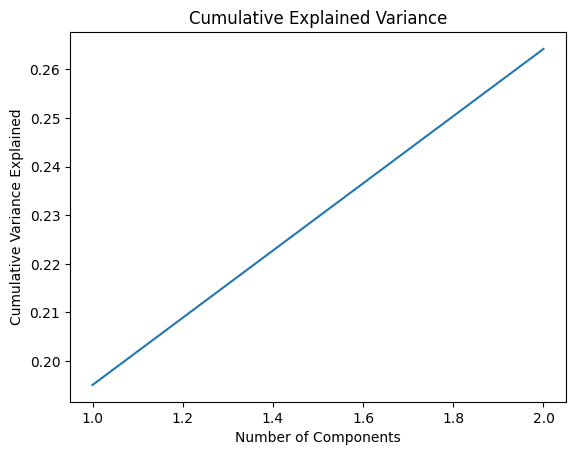

In [125]:
# Cumulative Explained Variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.show()

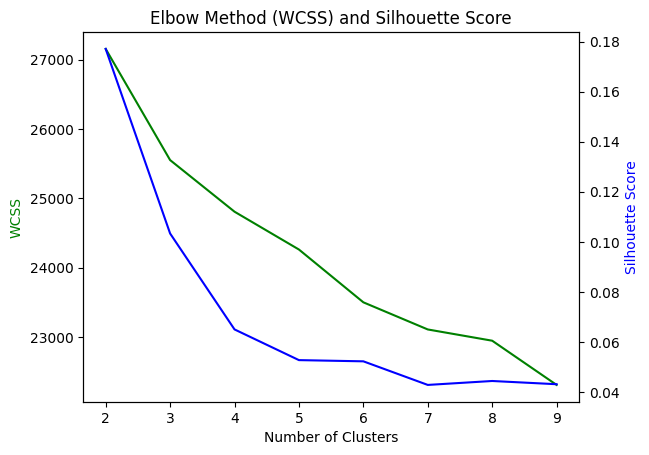

Optimal number of clusters based on silhouette score: 2


In [126]:
WCSS = []
silhouette_scores = []

# Calculate WCSS and Silhouette Score for each k
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x, kmeans.labels_))

# Plot WCSS and Silhouette Score side by side
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(range(2, 10), WCSS, 'g-')
ax2.plot(range(2, 10), silhouette_scores, 'b-')

ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS', color='g')
ax2.set_ylabel('Silhouette Score', color='b')
plt.title("Elbow Method (WCSS) and Silhouette Score")
plt.show()

# Find the optimal number of clusters based on Silhouette Score
optimal_k = np.argmax(silhouette_scores) + 2  # Adjusting for index offset
print("Optimal number of clusters based on silhouette score:", optimal_k)



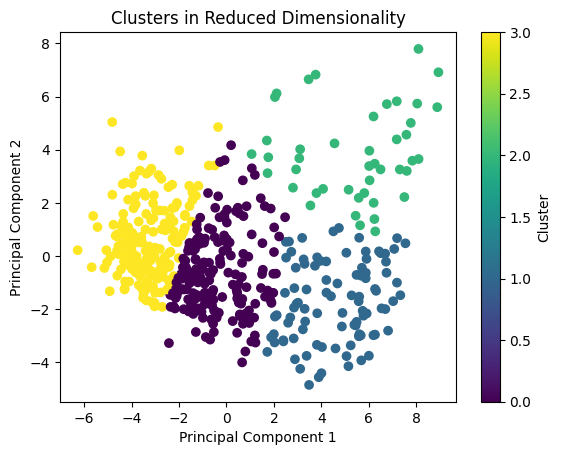

In [128]:
# Apply PCA to reduce dimensions of the dataset to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

# Apply KMeans clustering to the reduced data
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(pca_result)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_kmeans, cmap='viridis')
plt.title('Clusters in Reduced Dimensionality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


Optimal number of PCA components: 40


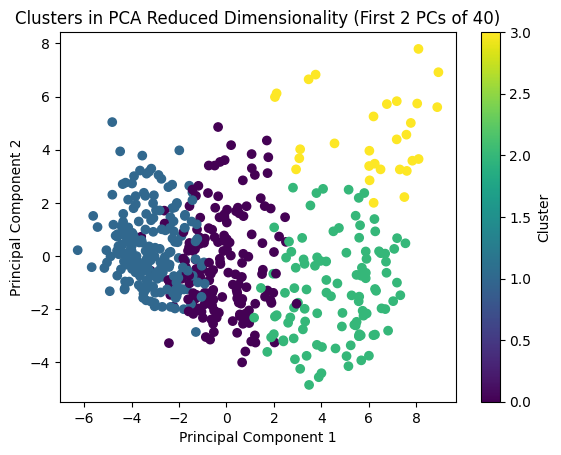

In [129]:
#Find the optimal number of PCA components
pca = PCA()
pca_result = pca.fit_transform(x)
# Calculate the cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Choose the number of components that explain at least 95% of the variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of PCA components: {optimal_components}")
# Step 2: Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
pca_result_optimal = pca_optimal.fit_transform(x)
# Step 3: Apply KMeans clustering to the reduced data
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
y_kmeans = kmeans.fit_predict(pca_result_optimal)
# Visualization: Use the first two principal components for plotting
plt.scatter(pca_result_optimal[:, 0], pca_result_optimal[:, 1], c=y_kmeans,
cmap='viridis')
plt.title(f'Clusters in PCA Reduced Dimensionality (First 2 PCs of {optimal_components})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


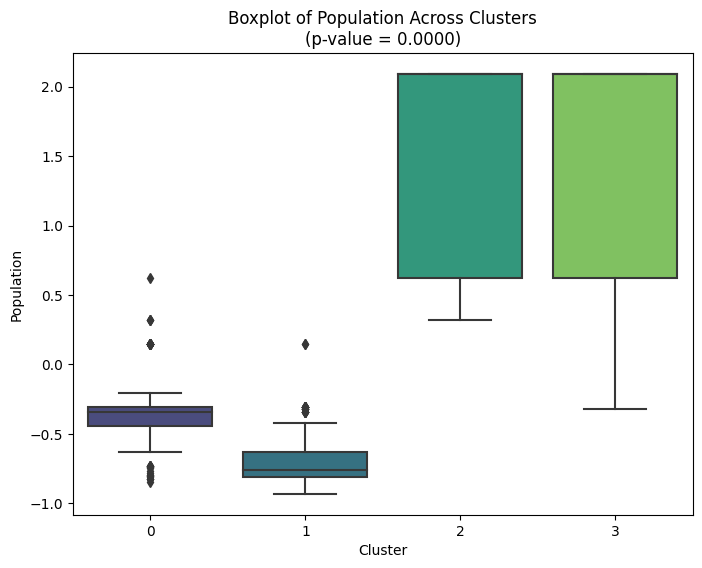

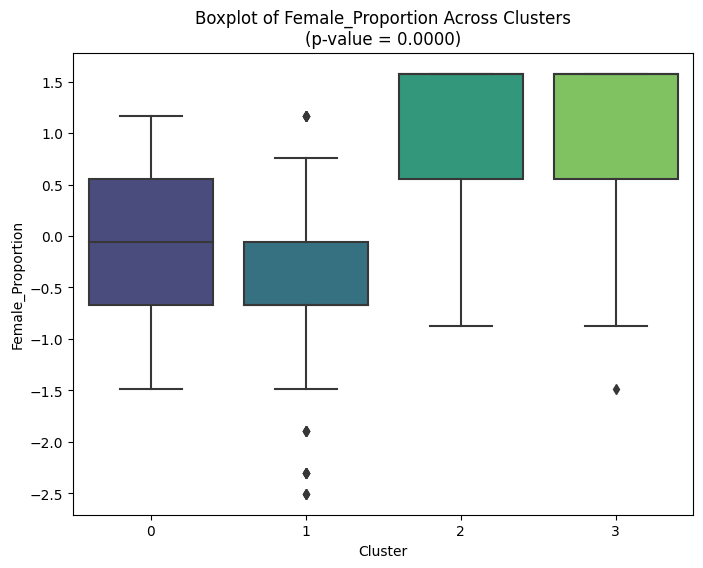

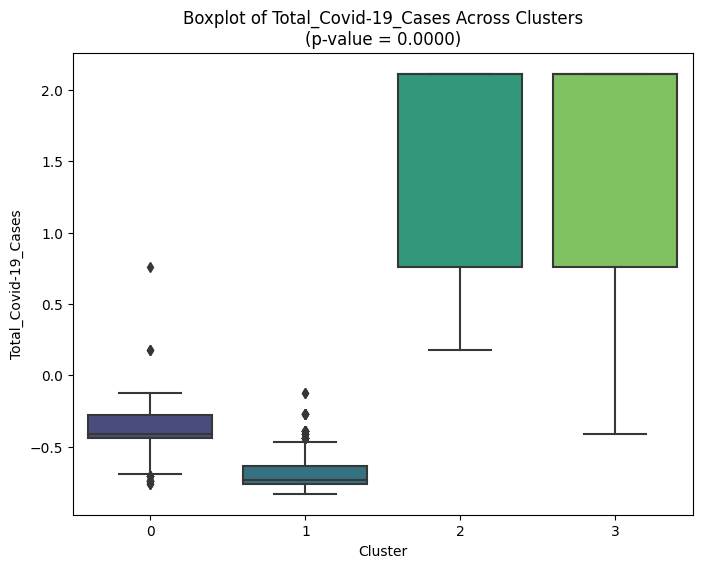

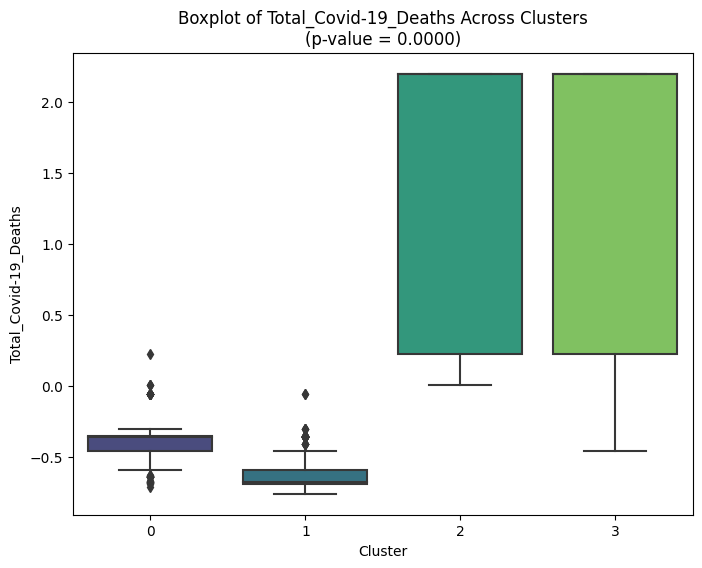

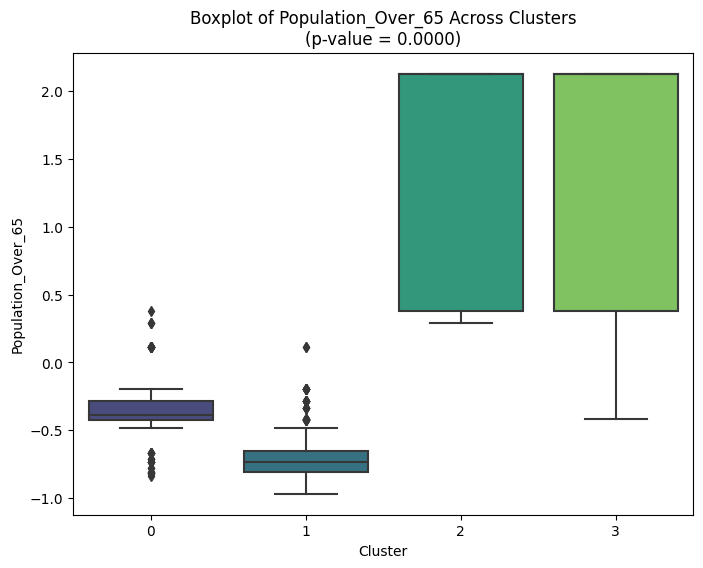

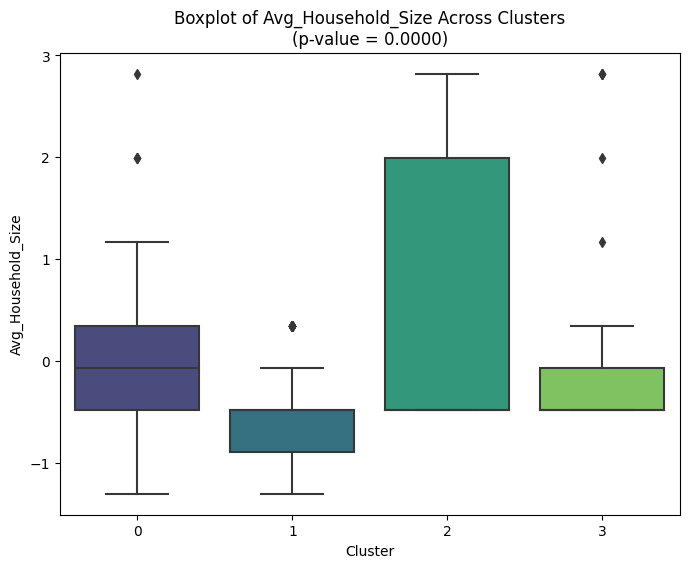

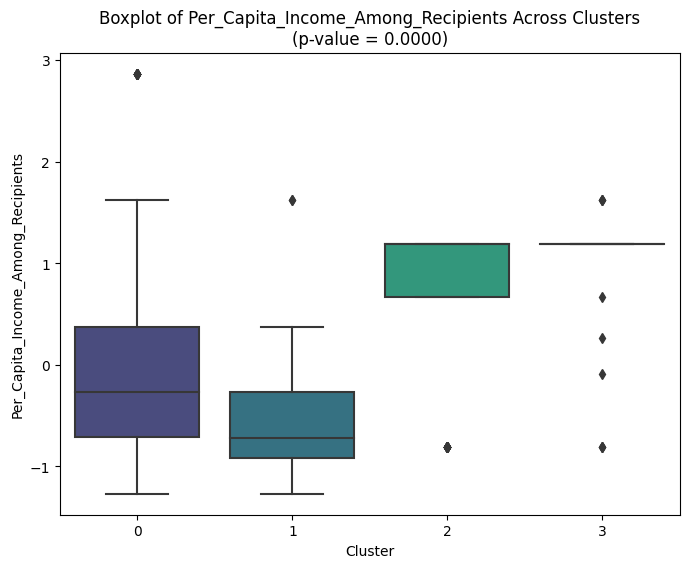

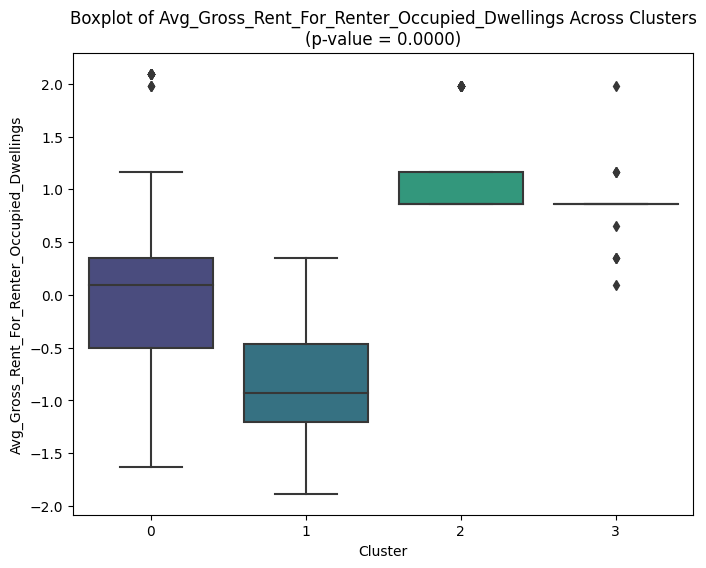

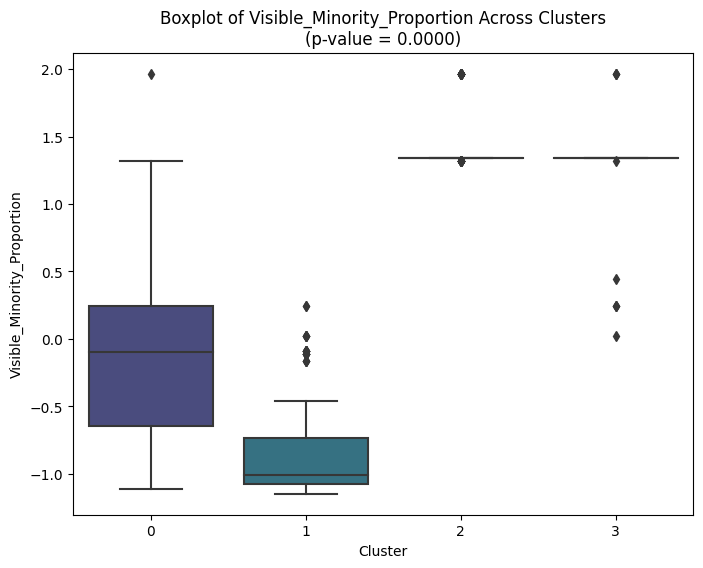

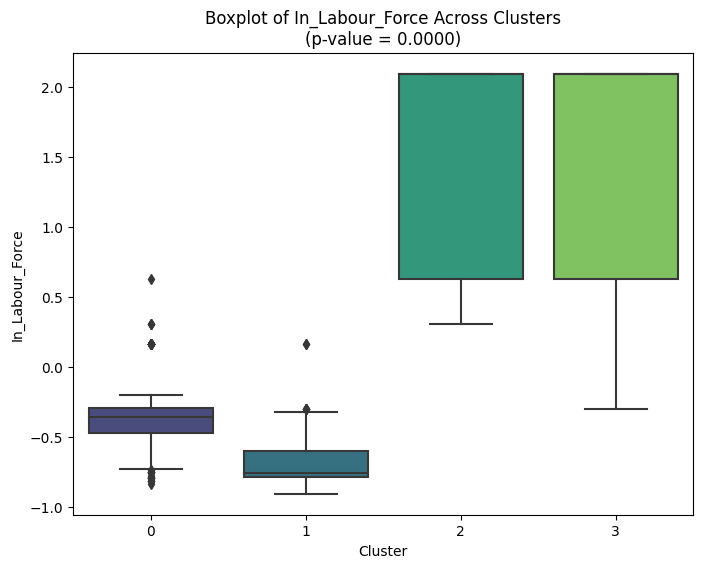

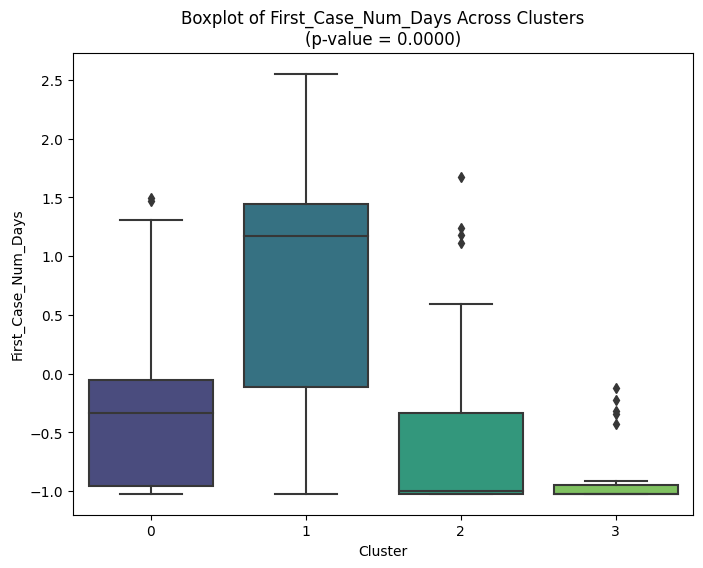

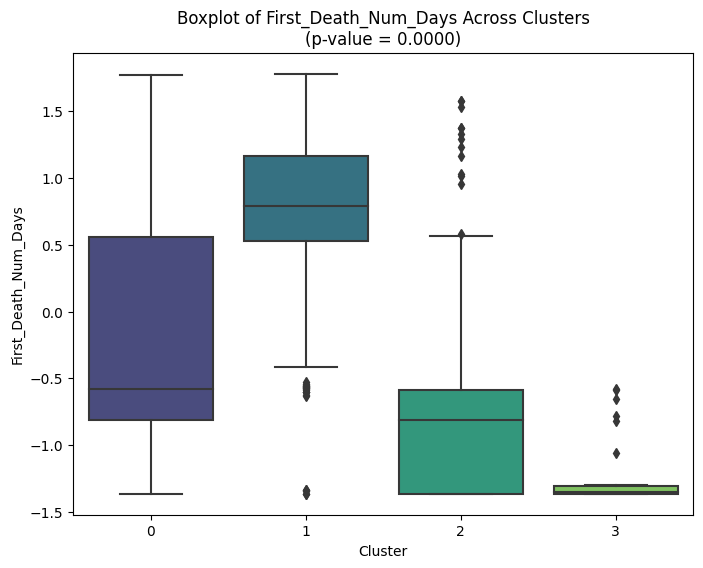

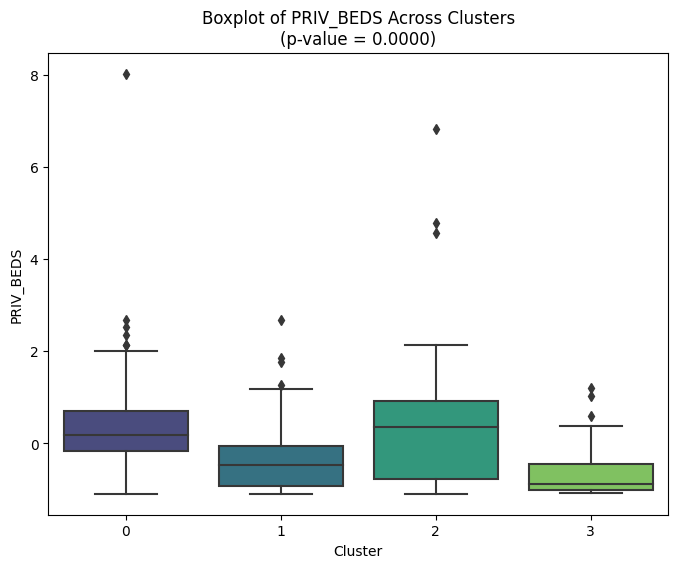

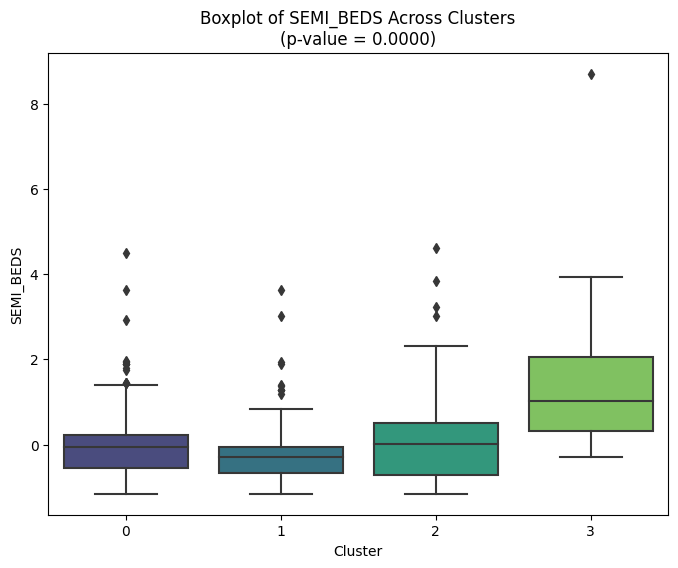

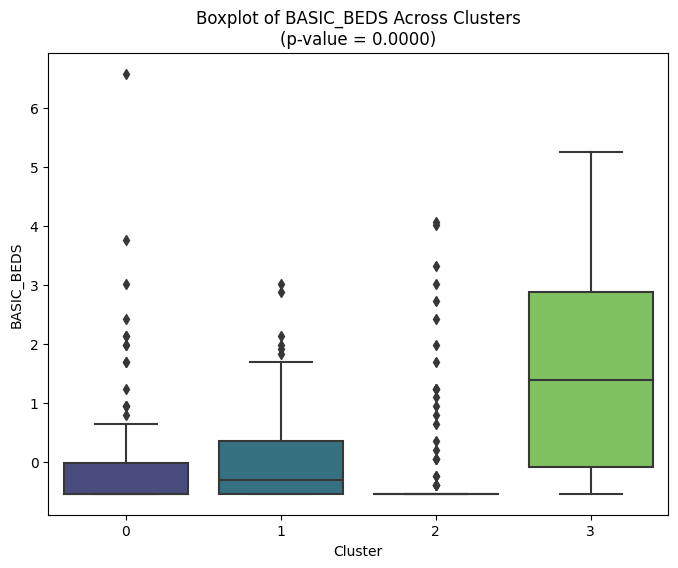

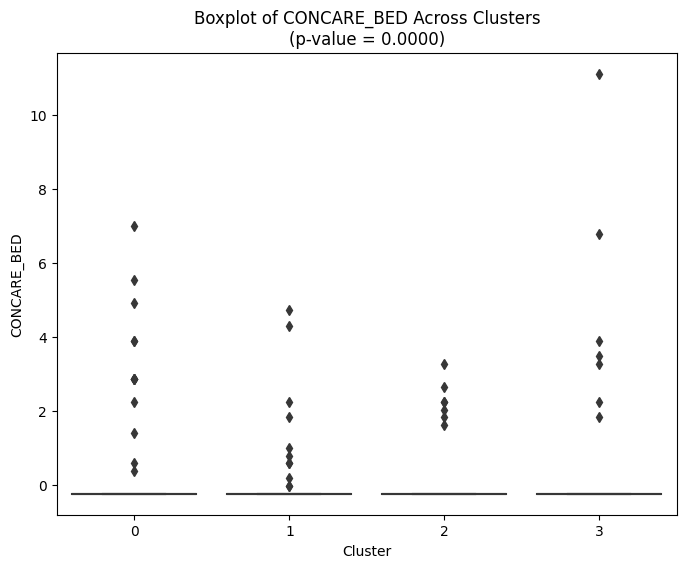

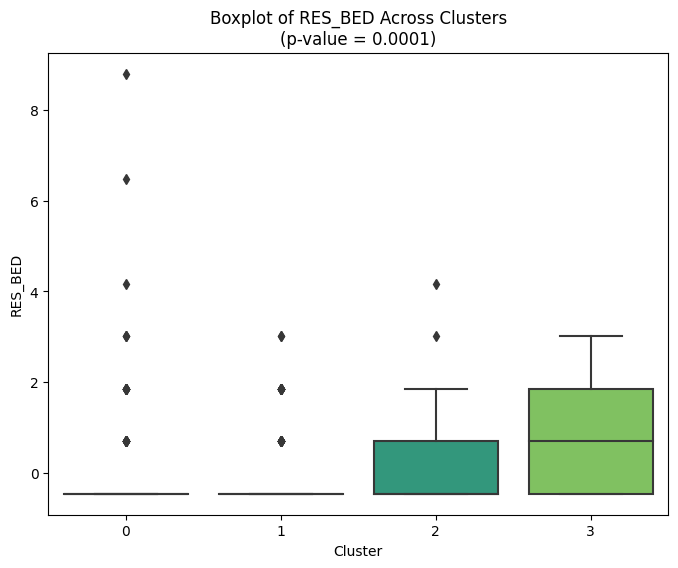

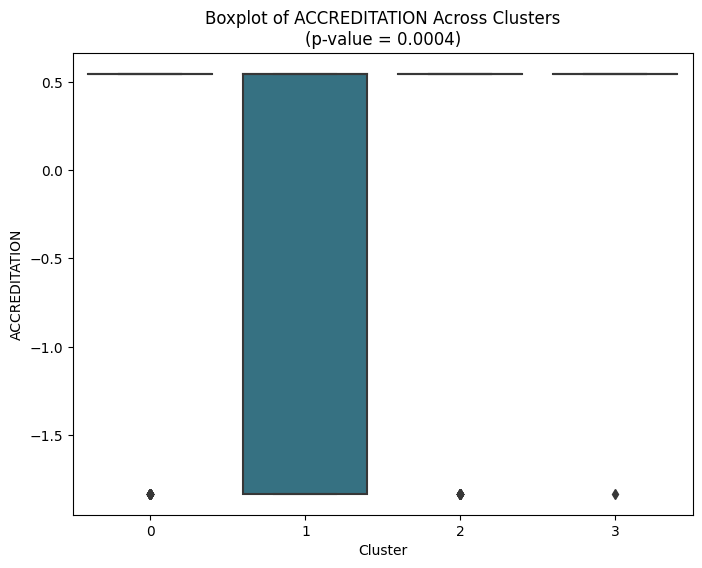

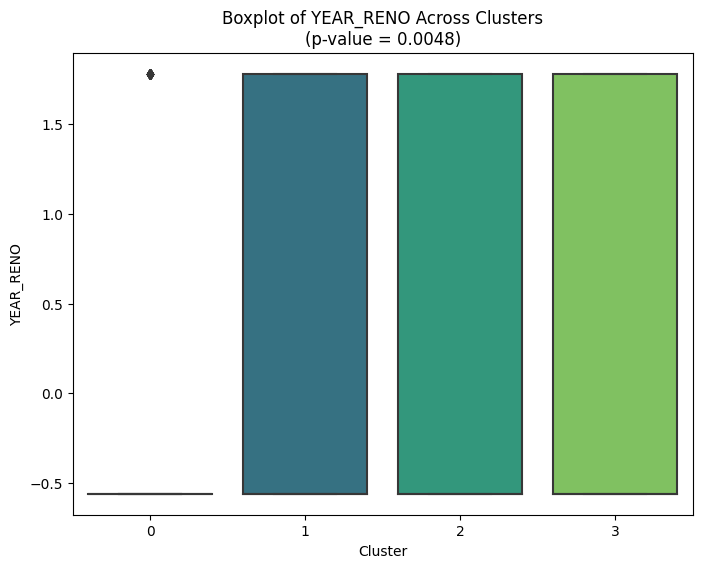

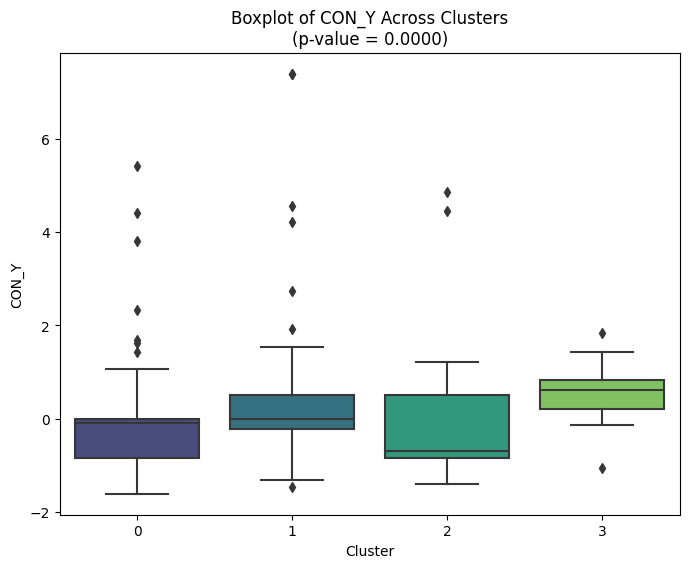

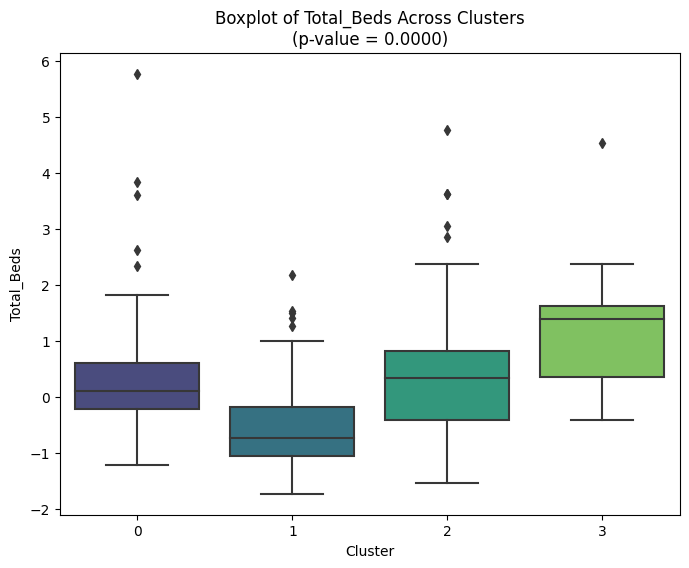

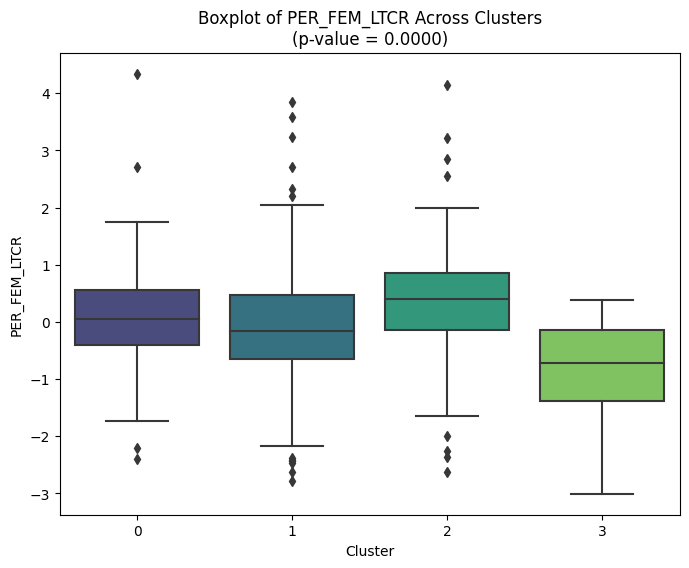

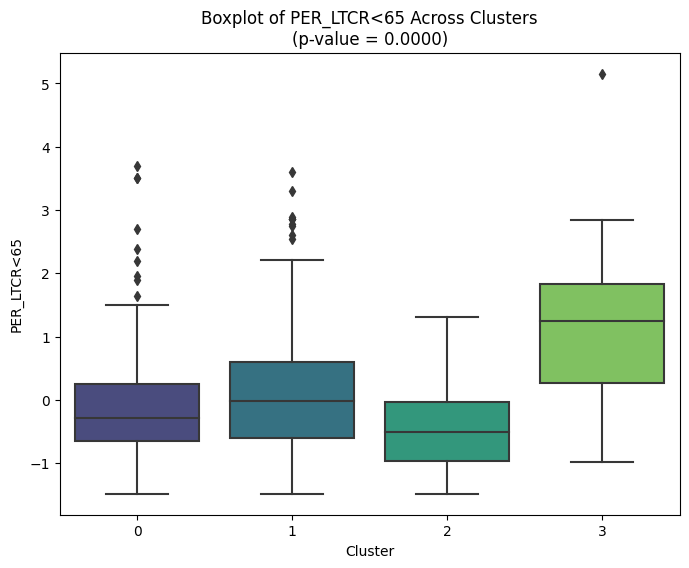

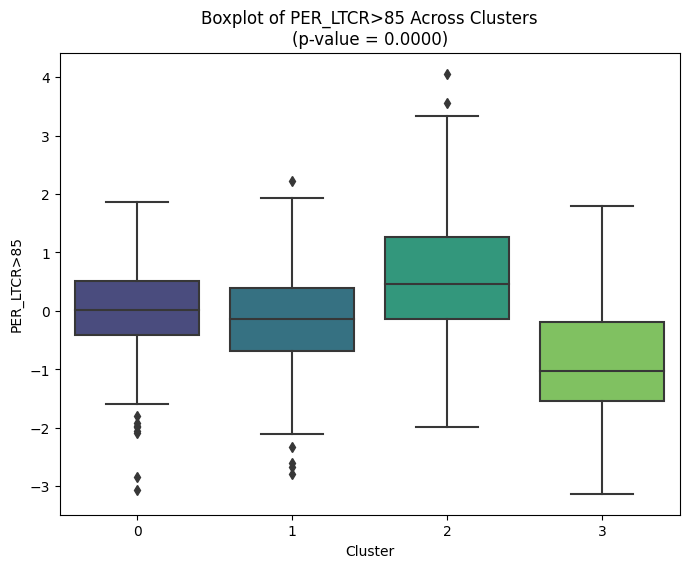

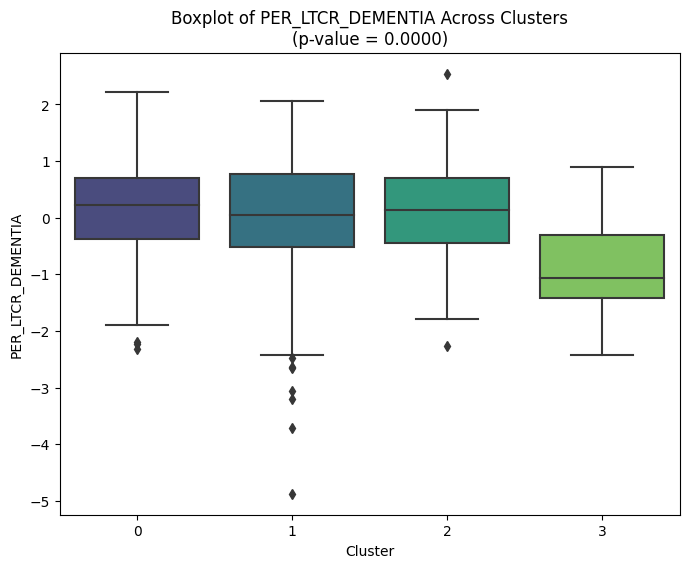

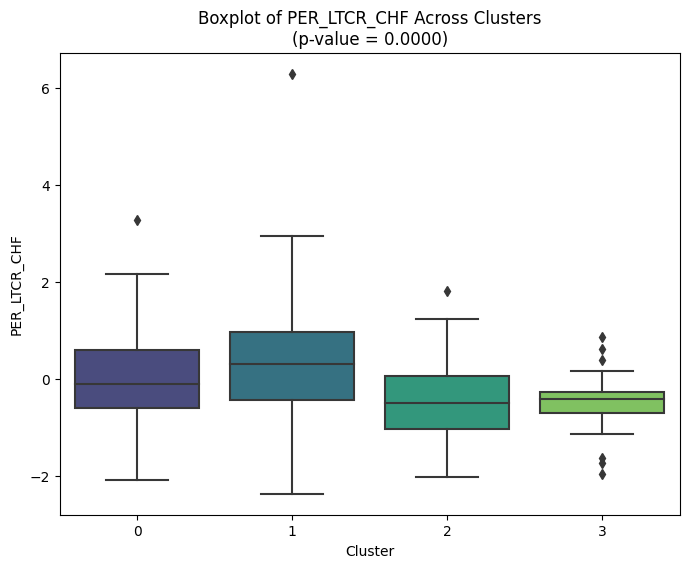

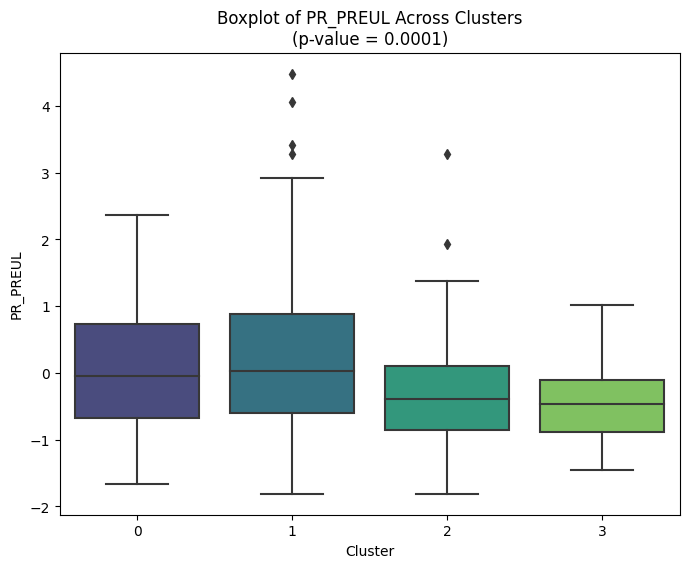

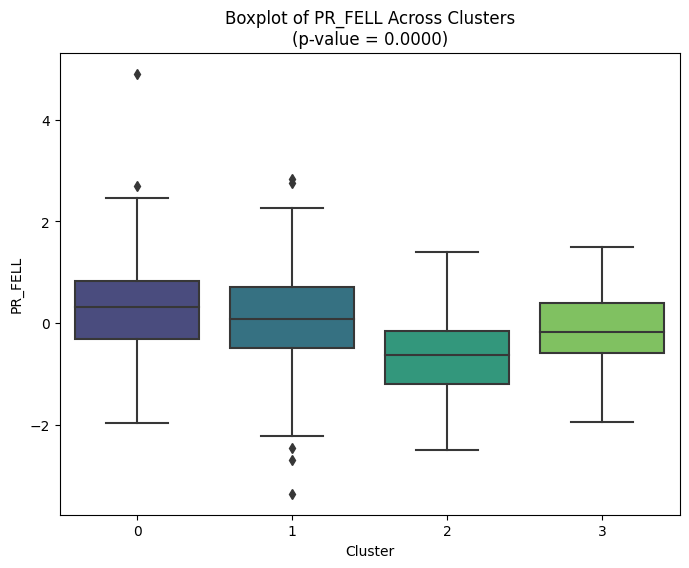

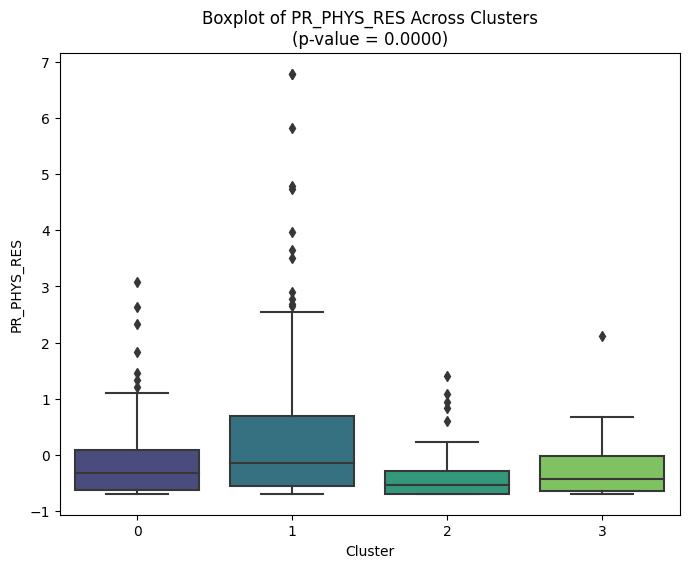

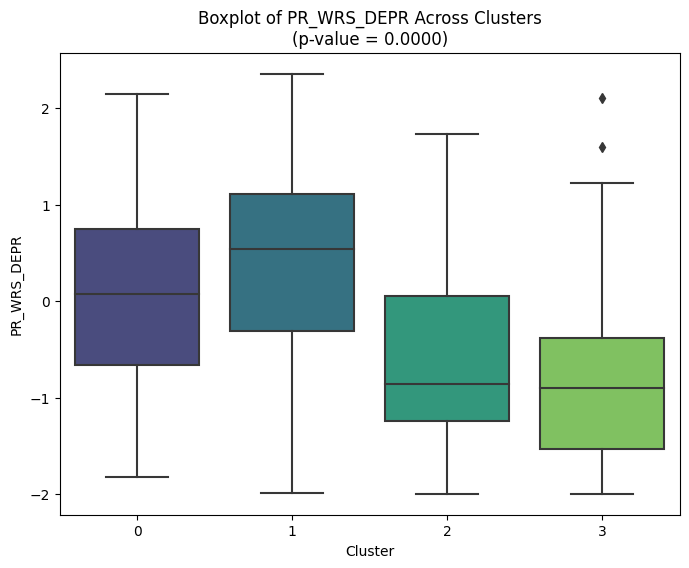

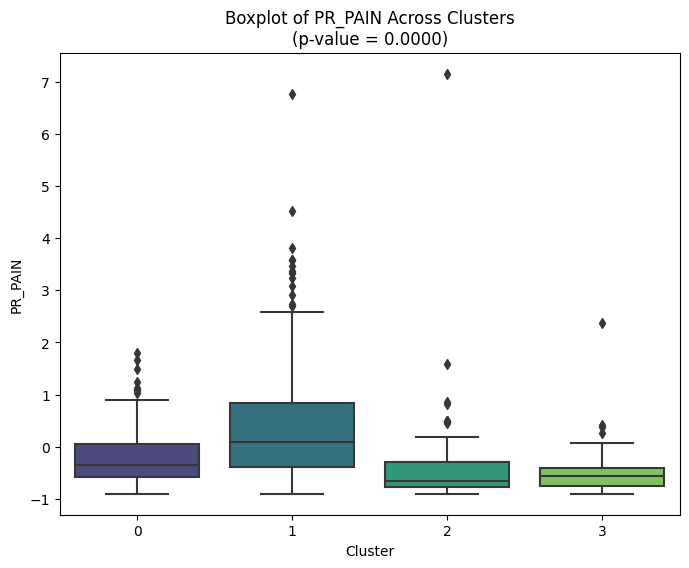

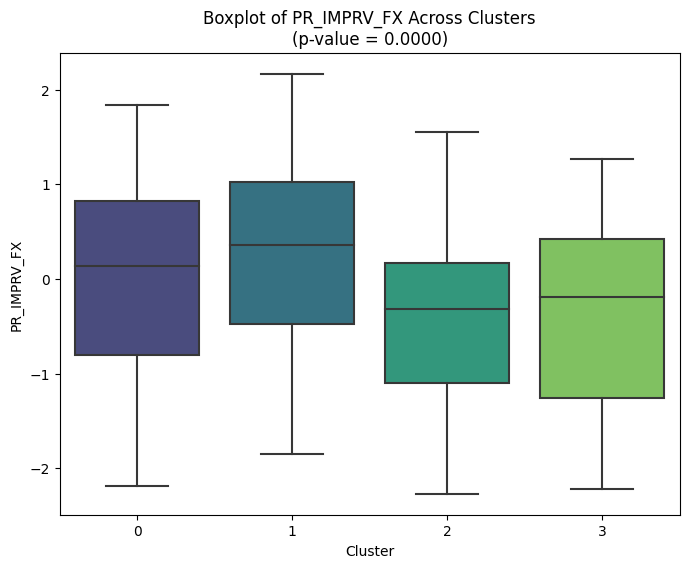

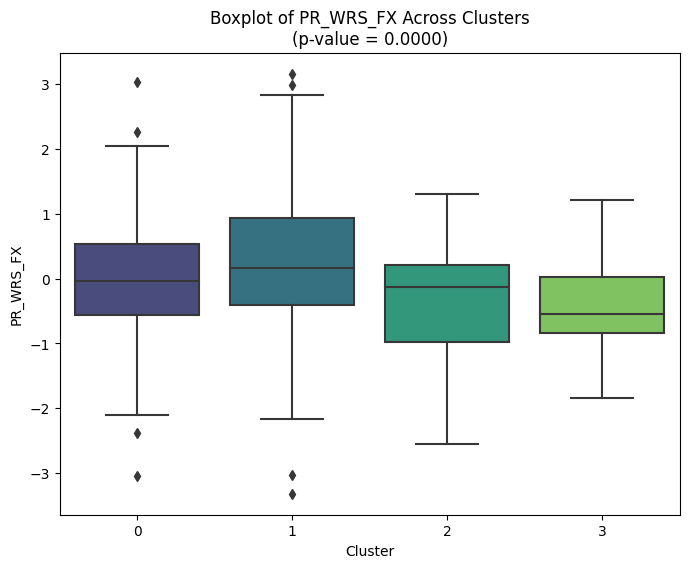

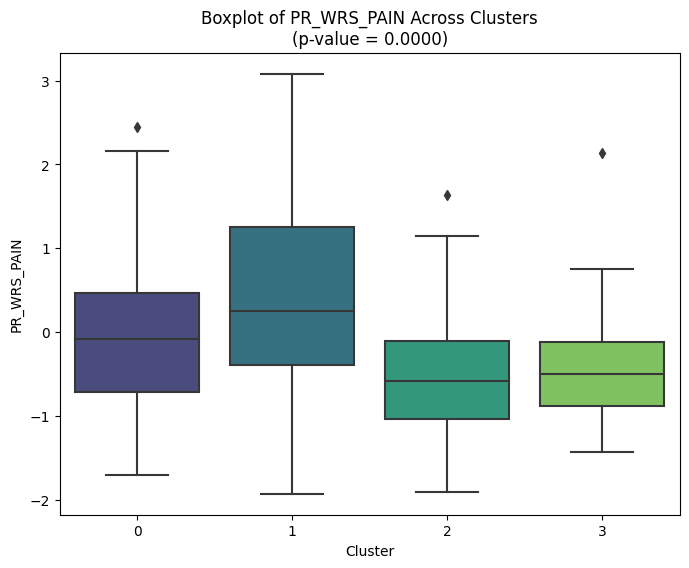

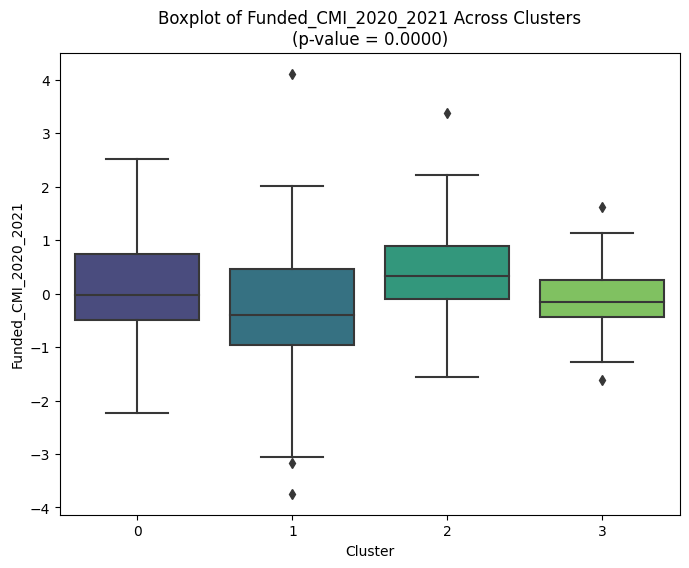

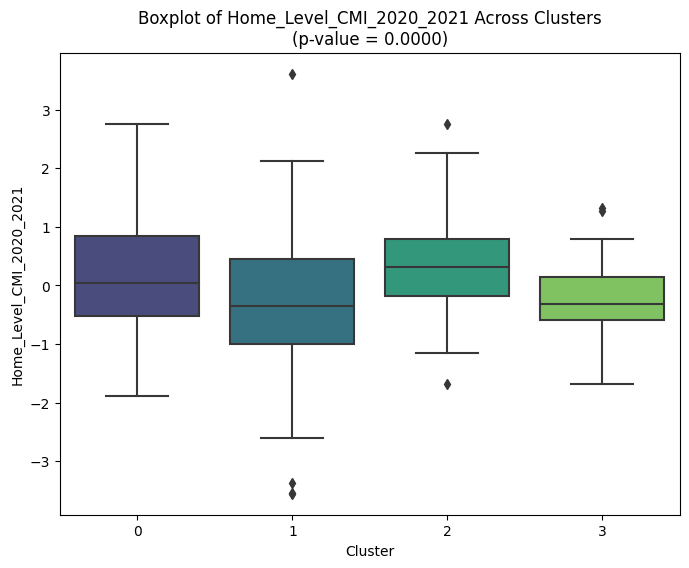

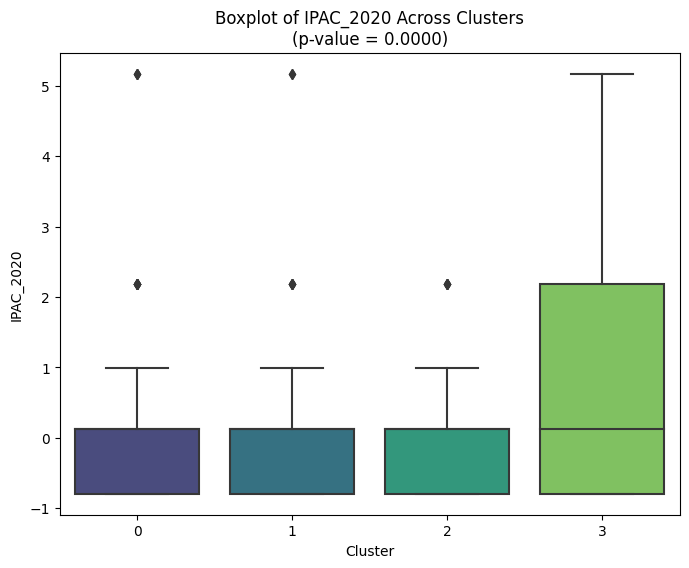

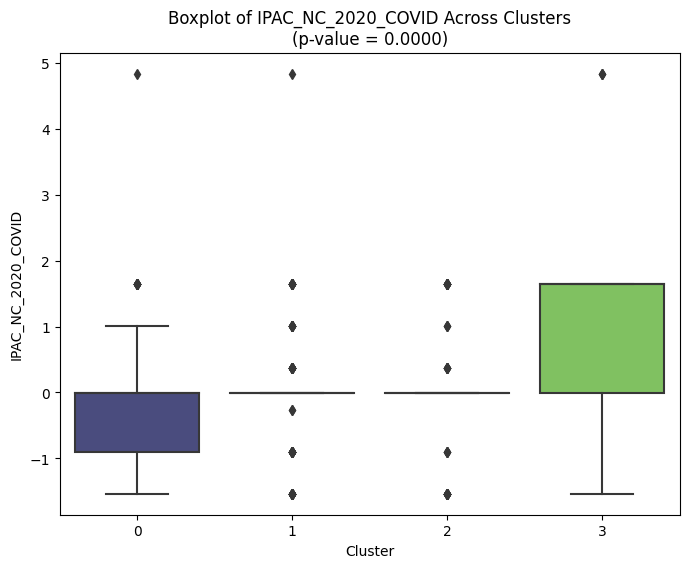

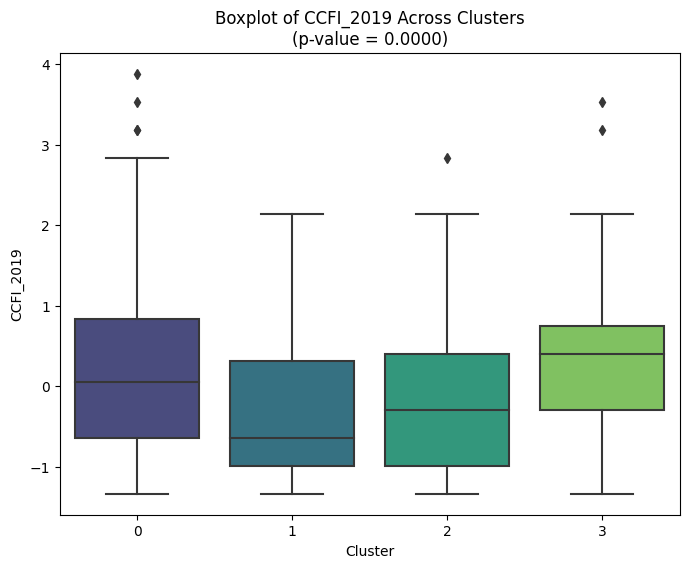

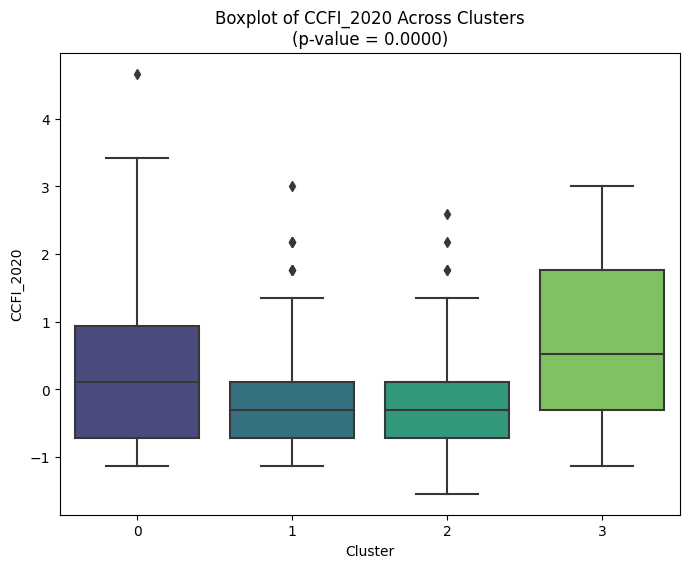

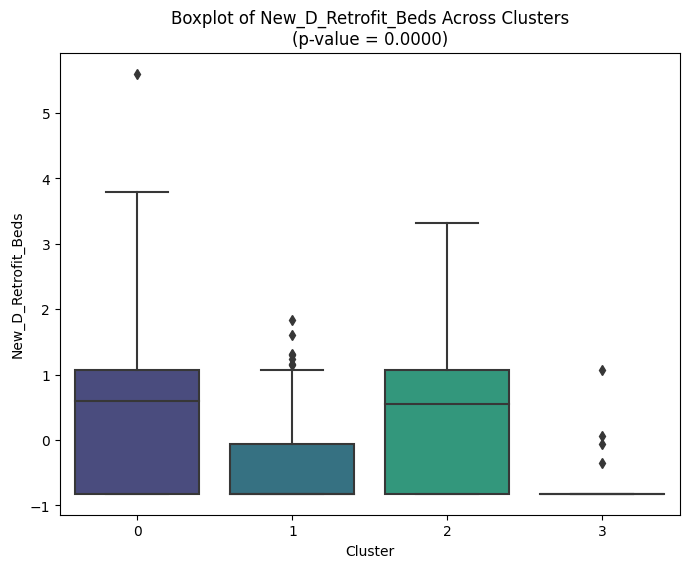

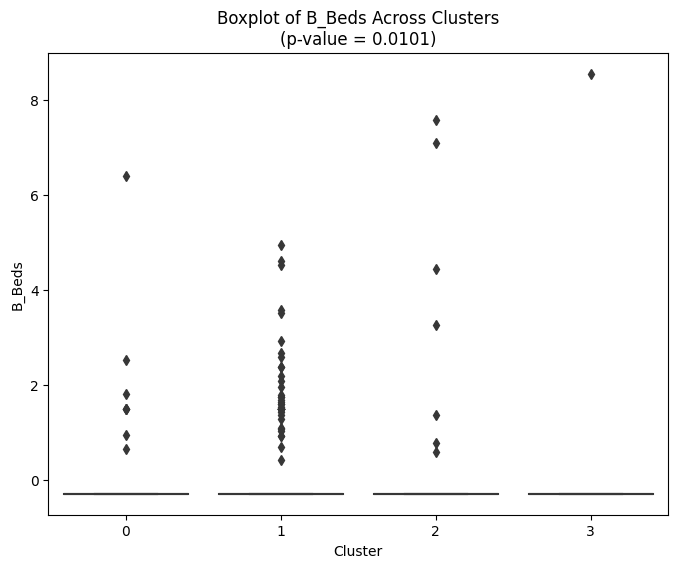

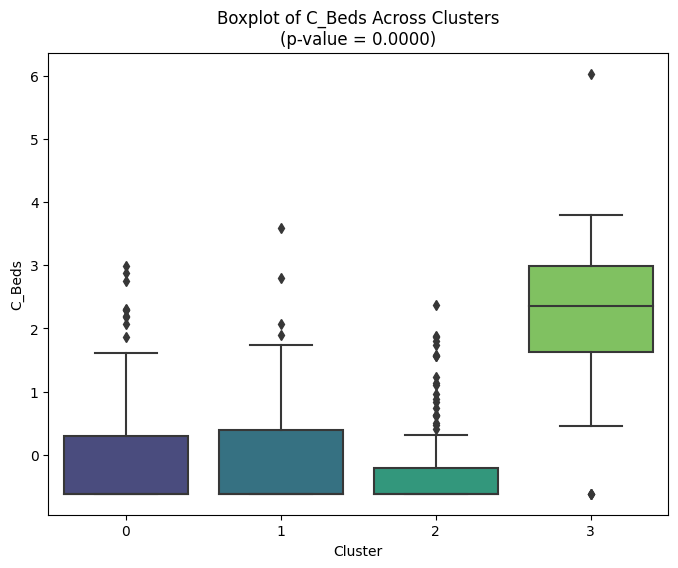

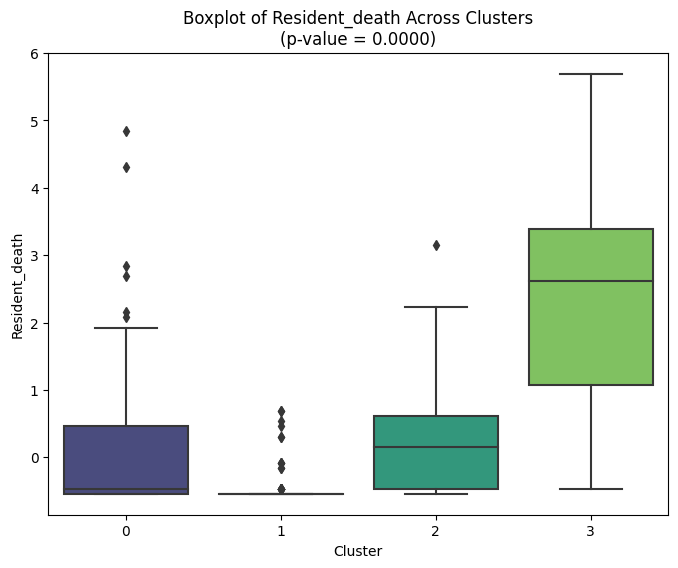

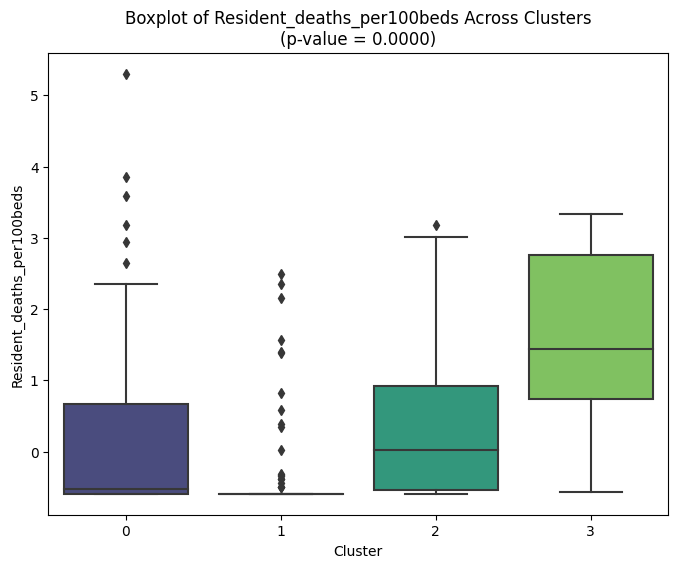

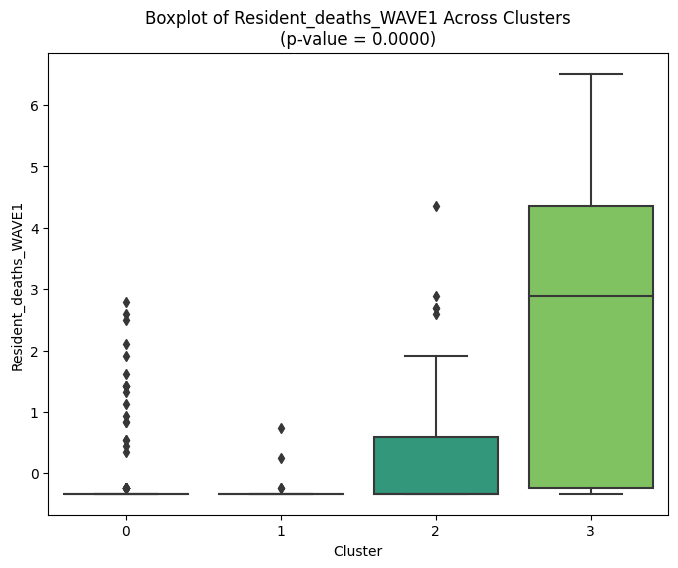

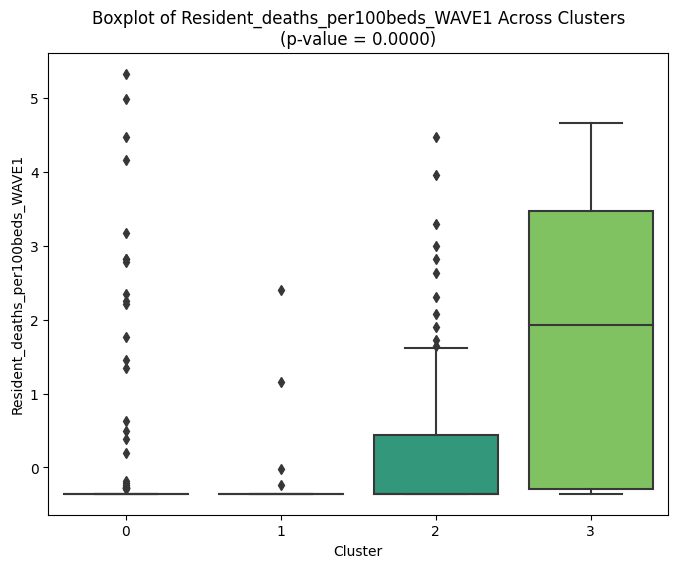

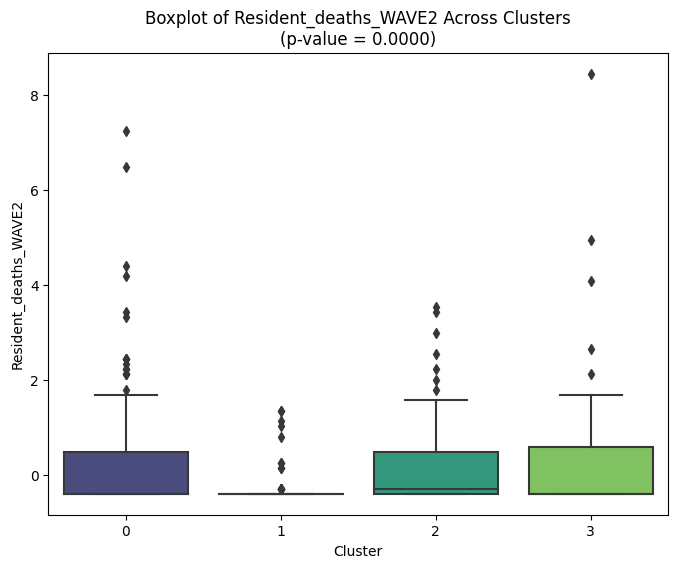

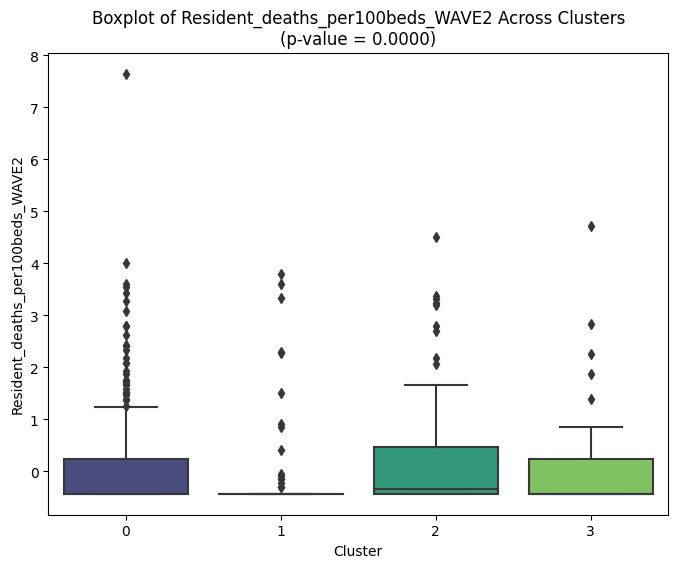

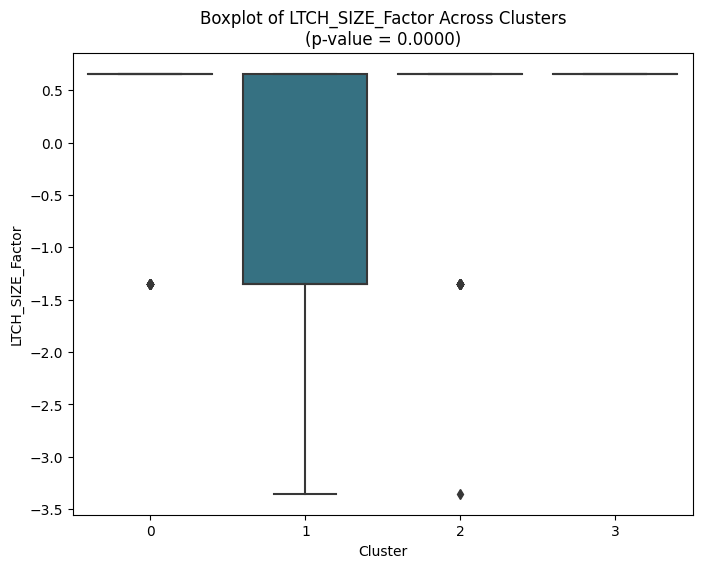

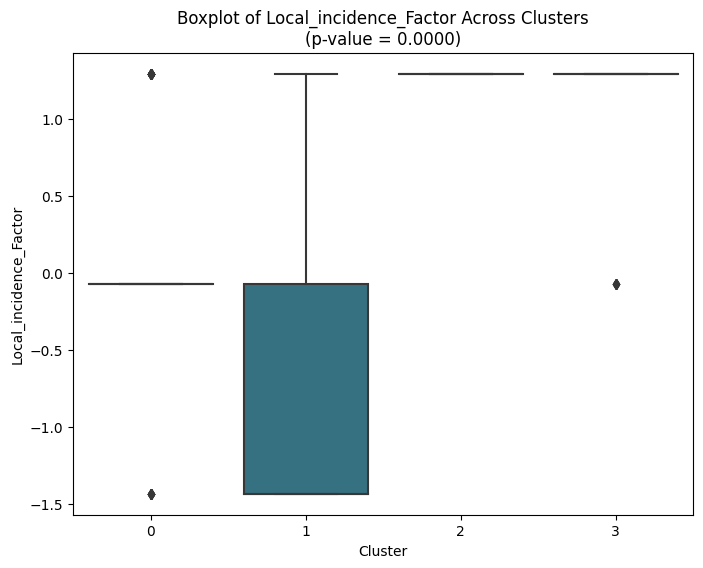

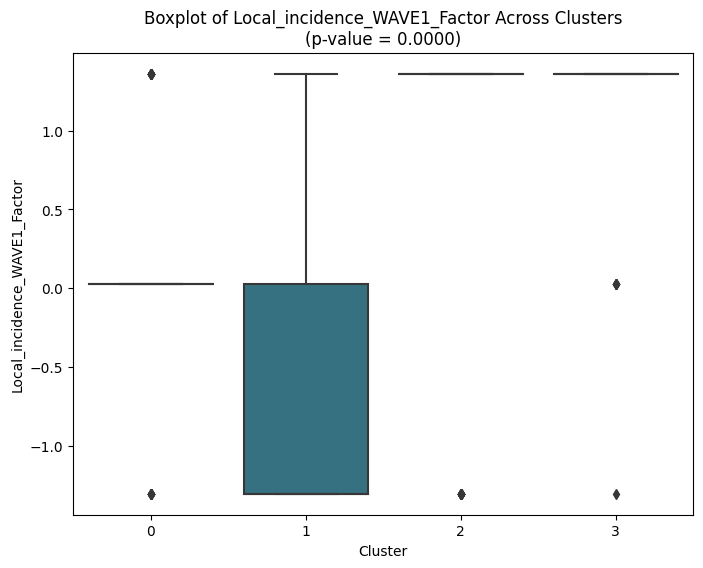

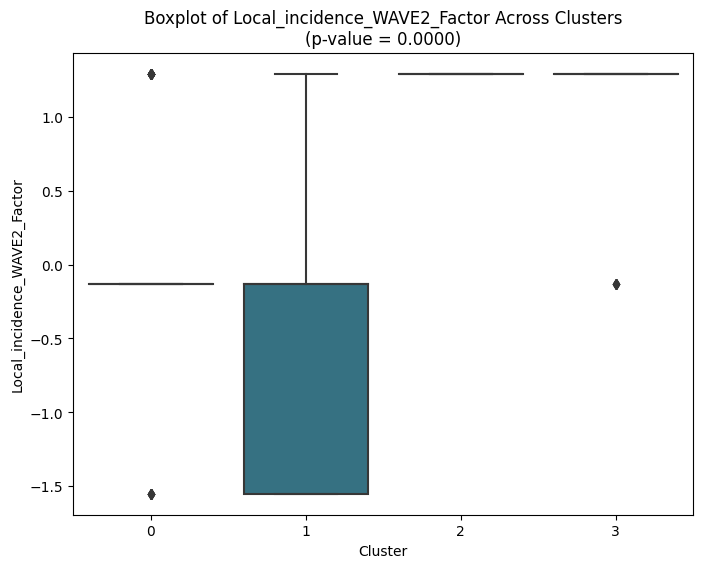

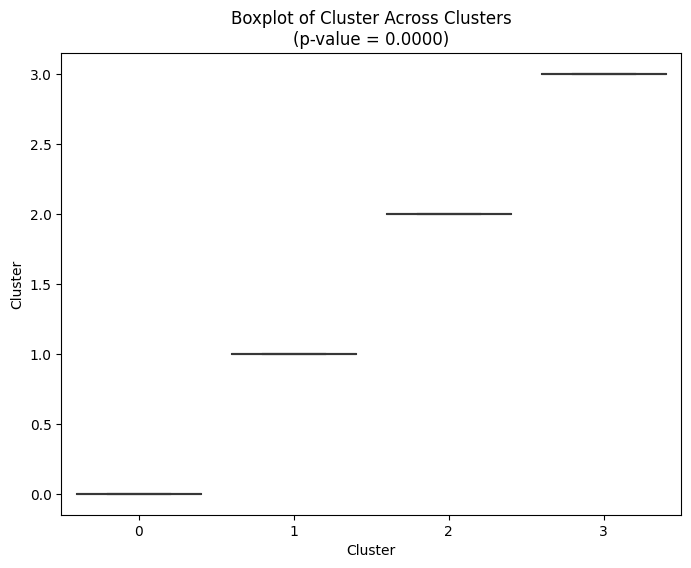

In [ ]:
from scipy.stats import f_oneway

# Add cluster labels to the dataframe
Q4_df['Cluster'] = y_kmeans

# Perform ANOVA to determine significant variables across clusters
anova_results = {}
for column in x.columns:
    groups = [Q4_df[Q4_df['Cluster'] == cluster][column] for cluster in Q4_df['Cluster'].unique()]
    f_stat, p_value = f_oneway(*groups)
    anova_results[column] = p_value

# Identify significant covariates with p-value < 0.05
significant_covariates = [covariate for covariate, p_value in anova_results.items() if p_value < 0.05]

# Plot boxplots for the most significant variables
for covariate in significant_covariates:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=covariate, data=Q4_df, palette='viridis')
    plt.title(f'Boxplot of {covariate} Across Clusters\n(p-value = {anova_results[covariate]:.4f})')
    plt.xlabel('Cluster')
    plt.ylabel(covariate)
    plt.show()

In [137]:
x

,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,...,Resident_deaths_per100beds,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2,LTCH_SIZE_Factor,Local_incidence_Factor,Local_incidence_WAVE1_Factor,Local_incidence_WAVE2_Factor,Cluster
0,-0.442839,0.760376,-0.442770,-0.354914,-0.286658,-0.480201,-1.036350,-0.504788,-0.642223,-0.471258,...,-0.544325,-0.332422,-0.354820,-0.287695,-0.365217,0.657975,-0.072766,0.028950,-0.129253,4
1,2.092442,1.576389,2.112881,2.200089,2.128046,-0.480201,1.191330,0.856616,1.337053,2.093484,...,1.353637,3.674798,2.130202,-0.396820,-0.429826,0.657975,1.290917,1.360647,1.292531,2
2,-0.629622,-0.259641,-0.637678,-0.640824,-0.668570,0.344865,0.375041,0.103499,-0.457995,-0.599708,...,-0.591480,-0.332422,-0.354820,-0.396820,-0.429826,-1.347660,-0.072766,0.028950,-0.129253,4
3,-0.442839,0.760376,-0.442770,-0.354914,-0.286658,-0.480201,-1.036350,-0.504788,-0.642223,-0.471258,...,1.860547,1.622319,2.777814,-0.396820,-0.429826,-1.347660,-0.072766,0.028950,-0.129253,3
4,-0.203091,0.556373,-0.277782,-0.428238,-0.288408,1.169931,0.260936,0.653854,0.444253,-0.203878,...,1.412580,1.329108,2.205506,-0.396820,-0.429826,0.657975,-0.072766,0.028950,-0.129253,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.775169,-0.667647,-0.757353,-0.690844,-0.719949,-0.892734,-0.037493,-1.008073,-1.072090,-0.772203,...,-0.591480,-0.332422,-0.354820,-0.396820,-0.429826,-1.347660,-1.436448,-1.302747,-1.551037,4
502,-0.728946,-0.667647,-0.709250,-0.636276,-0.733124,-0.480201,-0.046270,-1.268767,-0.963442,-0.754817,...,-0.591480,-0.332422,-0.354820,-0.396820,-0.429826,-1.347660,-0.072766,0.028950,-0.129253,4
503,-0.744381,-0.667647,-0.675778,-0.631161,-0.736327,-0.892734,-0.256925,-1.094971,-0.996509,-0.738349,...,-0.591480,-0.332422,-0.354820,-0.396820,-0.429826,-3.353296,-1.436448,-1.302747,-1.551037,4
504,-0.881293,-2.503677,-0.736587,-0.735180,-0.925632,-0.480201,-0.720367,-1.399114,-1.142947,-0.865601,...,-0.591480,-0.332422,-0.354820,-0.396820,-0.429826,-3.353296,-1.436448,-1.302747,-1.551037,4


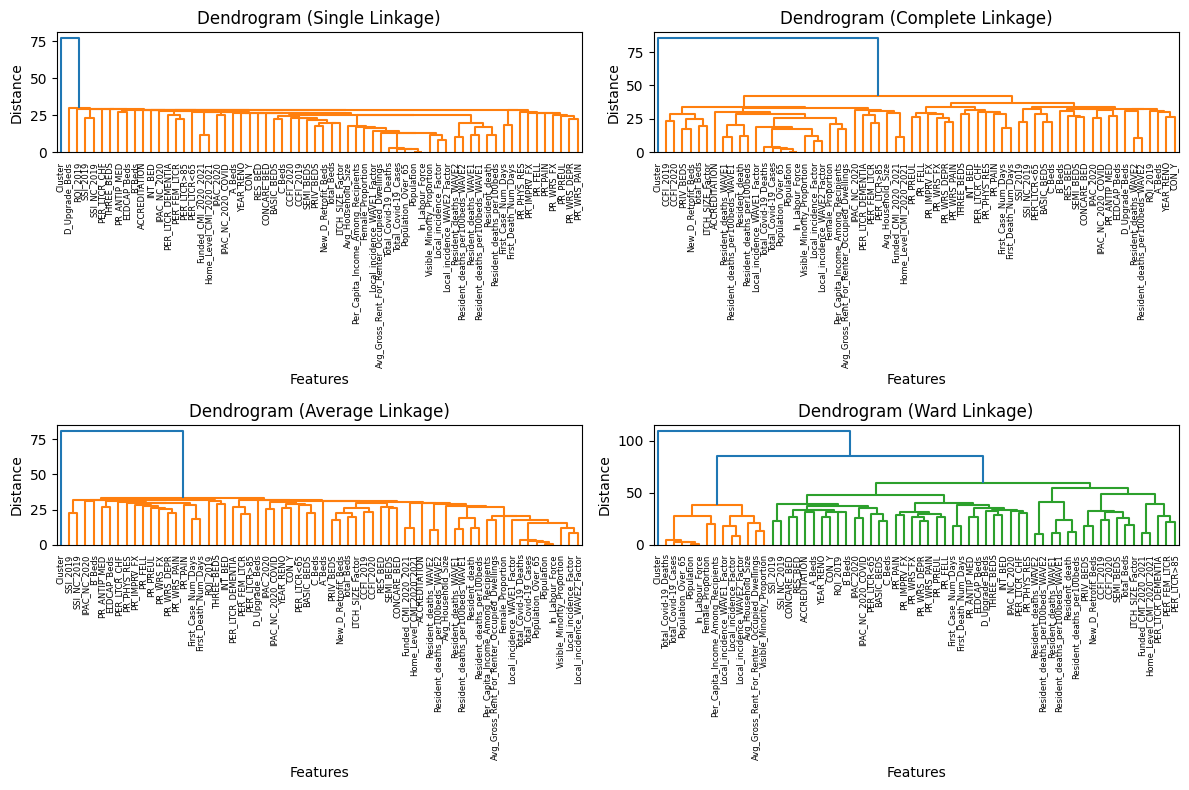

In [139]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

linkage_methods = ['single', 'complete', 'average', 'ward']

# Get the number of features (columns) in the dataframe
num_features = x.shape[1]

# Transpose the DataFrame so we cluster features instead of data points
x_transposed = x.T

plt.figure(figsize=(12, 8))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    
    # Perform Linkage on the transposed DataFrame (clustering features, not rows)
    linked = linkage(x_transposed, method=method)
    
    # Use feature names (columns) as labels
    labels = x.columns.tolist()
    
    # Plot dendrogram
    dendrogram(linked, labels=labels)
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
    plt.xlabel("Features")
    plt.ylabel("Distance")
    
    # Rotate the labels to make them readable
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [140]:

# Define linkage methods to evaluate
linkage_methods = ['single', 'complete', 'average', 'ward']
sil_scores = {}

# Loop through each linkage method and calculate silhouette score
for method in linkage_methods:
    # Perform Hierarchical Clustering using the current linkage method
    linked = linkage(x, method=method)
    
    # Cut the dendrogram to form a specific number of clusters (e.g., 5 clusters)
    clusters = fcluster(linked, 5, criterion='maxclust')
    
    # Compute silhouette score for the clusters
    sil_score = silhouette_score(x, clusters)
    
    # Store the silhouette score for each method
    sil_scores[method] = sil_score

# Print the silhouette scores for each method
print(sil_scores)

# Find the linkage method with the highest silhouette score
best_method = max(sil_scores, key=sil_scores.get)
print(f"The best linkage method is: {best_method} with a silhouette score of {sil_scores[best_method]}")

{'single': 0.3080574742084815, 'complete': 0.2072537116293599, 'average': 0.30201411441899106, 'ward': 0.09191362661693589}
The best linkage method is: single with a silhouette score of 0.3080574742084815


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


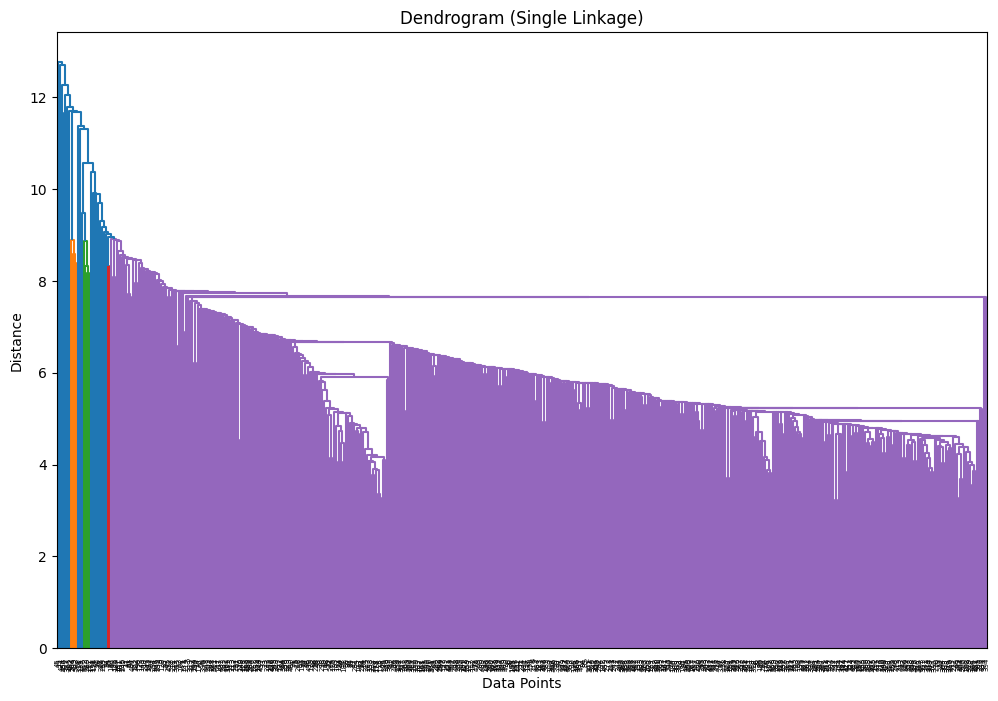

<Figure size 800x600 with 0 Axes>

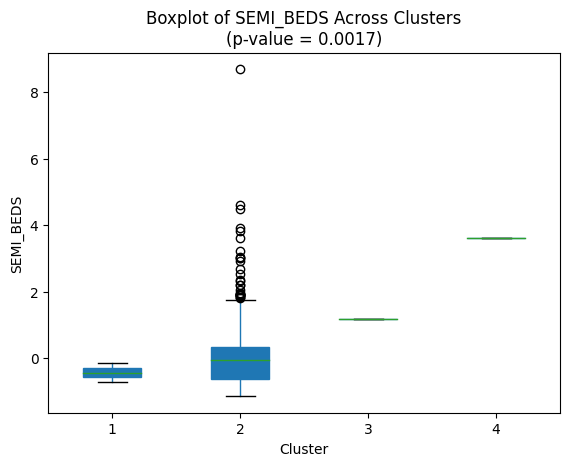

<Figure size 800x600 with 0 Axes>

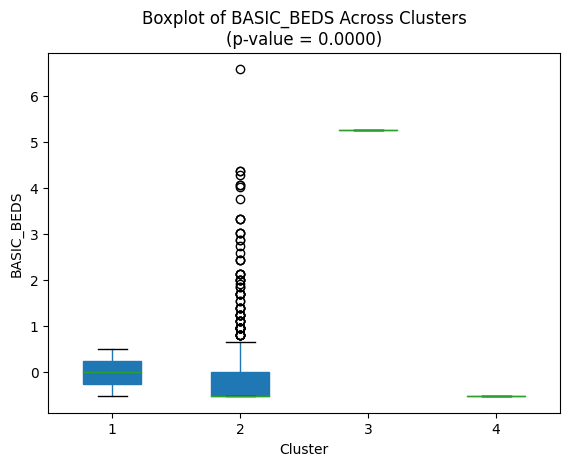

<Figure size 800x600 with 0 Axes>

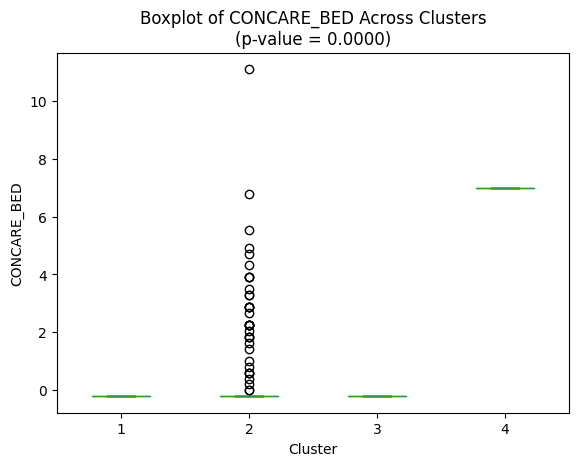

<Figure size 800x600 with 0 Axes>

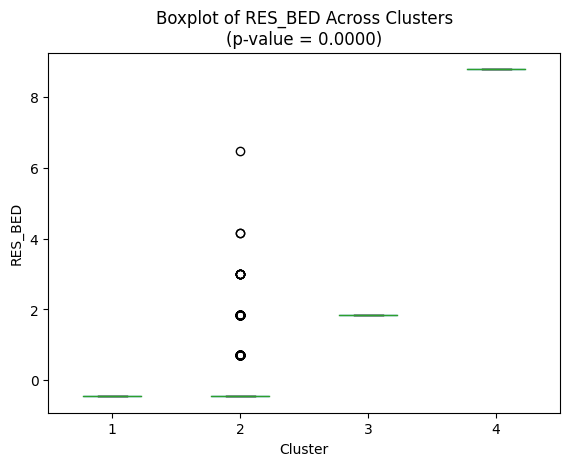

<Figure size 800x600 with 0 Axes>

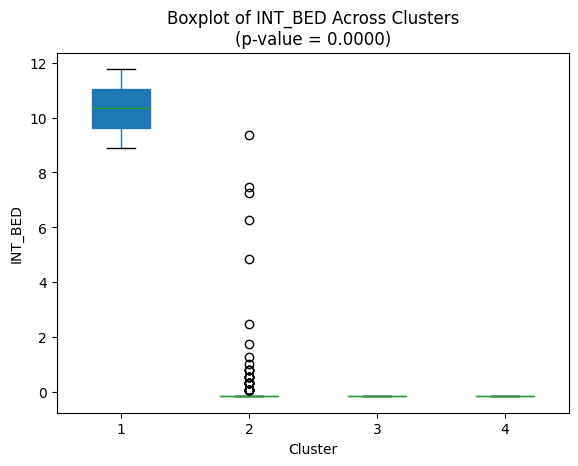

<Figure size 800x600 with 0 Axes>

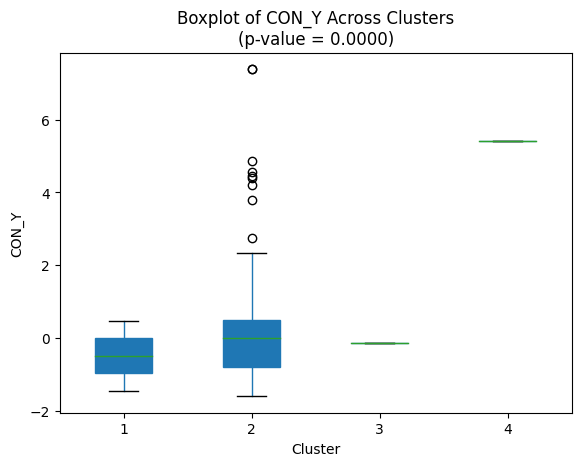

<Figure size 800x600 with 0 Axes>

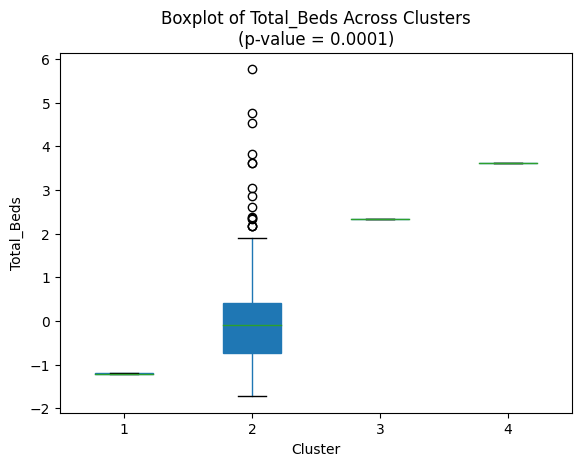

<Figure size 800x600 with 0 Axes>

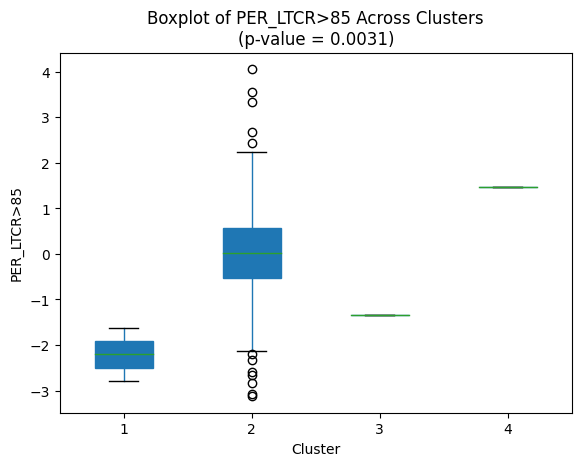

<Figure size 800x600 with 0 Axes>

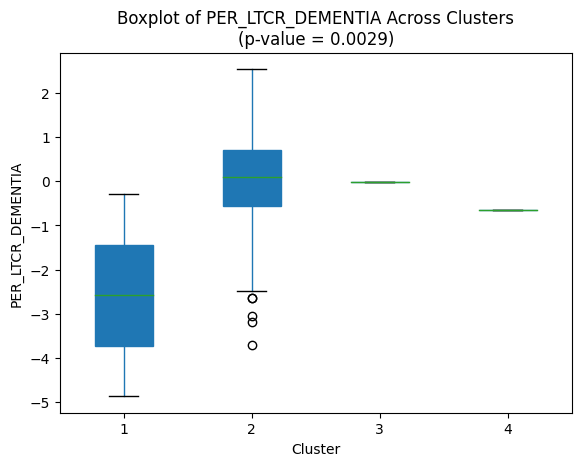

<Figure size 800x600 with 0 Axes>

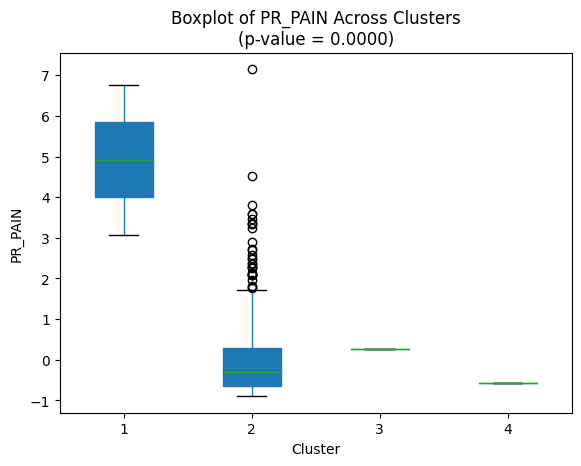

<Figure size 800x600 with 0 Axes>

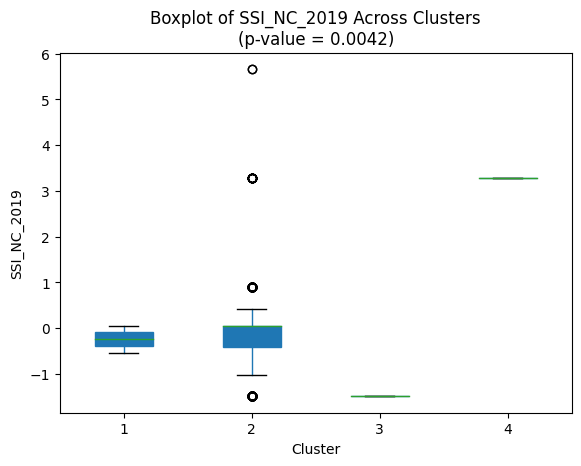

<Figure size 800x600 with 0 Axes>

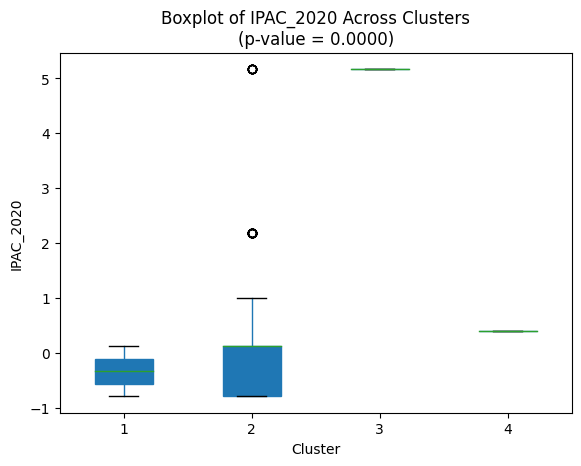

<Figure size 800x600 with 0 Axes>

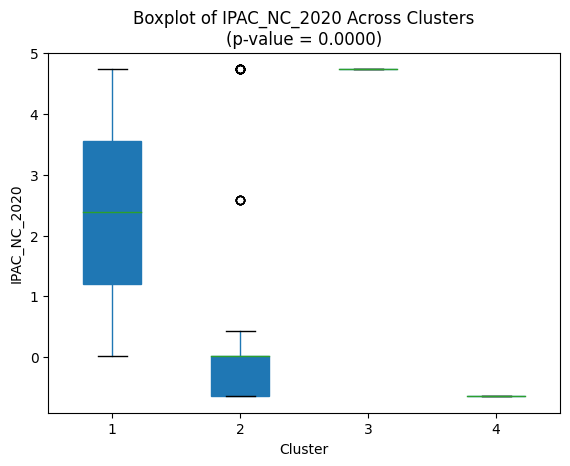

<Figure size 800x600 with 0 Axes>

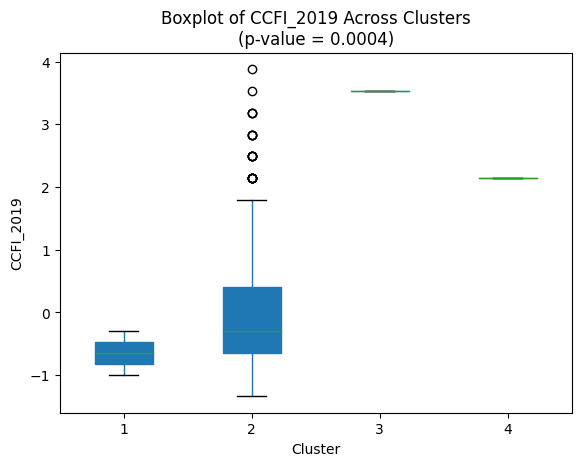

<Figure size 800x600 with 0 Axes>

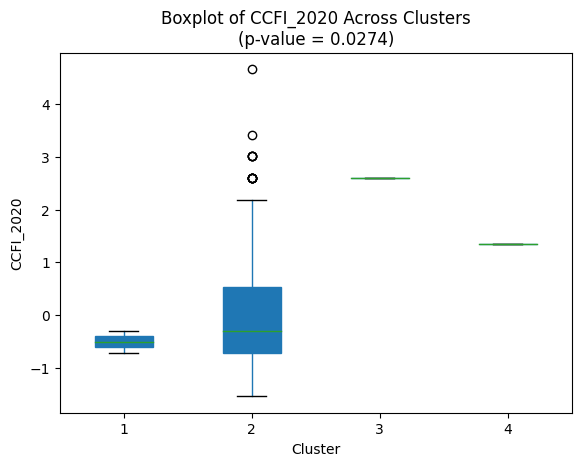

<Figure size 800x600 with 0 Axes>

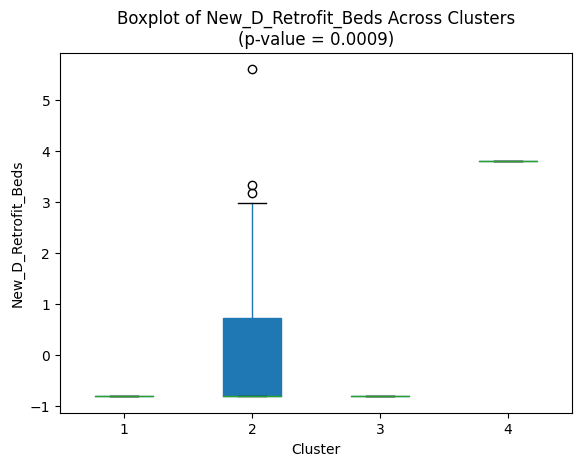

<Figure size 800x600 with 0 Axes>

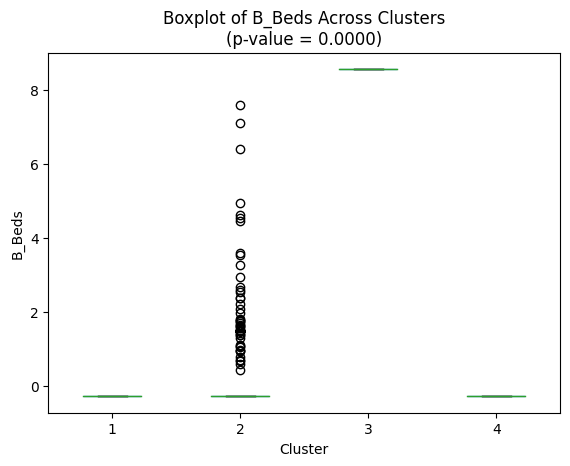

<Figure size 800x600 with 0 Axes>

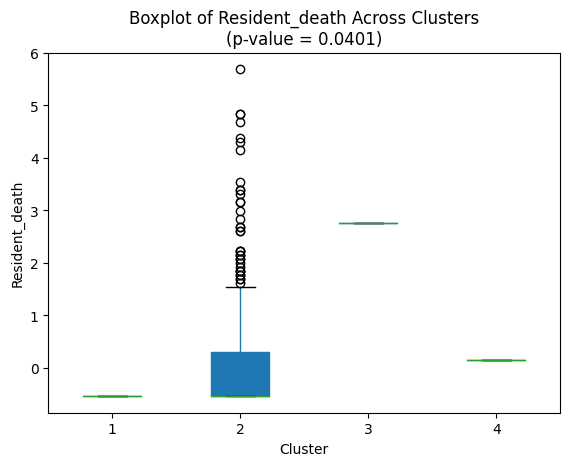

<Figure size 800x600 with 0 Axes>

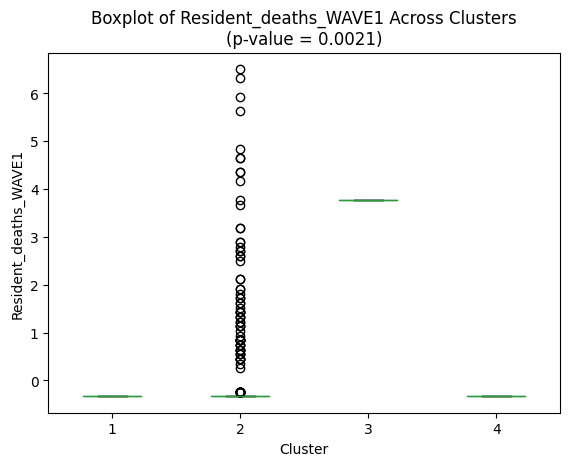

<Figure size 800x600 with 0 Axes>

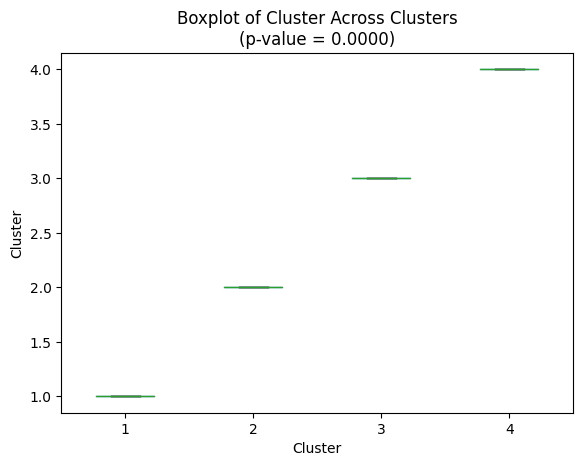

In [141]:
# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Perform hierarchical clustering (using Single method as it was shown to have the highest Silhouette score)
linkage_method = 'single'
linked = linkage(x_scaled, method=linkage_method)

# Assign clusters using a maximum cluster count (e.g., 4 clusters)
num_clusters = 4
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# Add cluster labels to the dataframe
x['Cluster'] = clusters

# Statistical test: ANOVA to check which covariates differ significantly between clusters
anova_results = {}
for column in x.columns:
    # Group data by clusters for the given column
    groups = [x[x['Cluster'] == cluster][column] for cluster in x['Cluster'].unique()]
    # Perform ANOVA
    f_stat, p_value = f_oneway(*groups)
    anova_results[column] = p_value

# Identify significant covariates (p-value < 0.05)
significant_covariates = [covariate for covariate, p_value in anova_results.items() if p_value < 0.05]

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, labels=x.index)
plt.title(f"Dendrogram ({linkage_method.capitalize()} Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Plot boxplots for significant covariates
for covariate in significant_covariates:
    plt.figure(figsize=(8, 6))
    x.boxplot(column=covariate, by='Cluster', grid=False, patch_artist=True)
    plt.title(f'Boxplot of {covariate} Across Clusters\n(p-value = {anova_results[covariate]:.4f})')
    plt.suptitle("")  # Remove default suptitle
    plt.xlabel("Cluster")
    plt.ylabel(covariate)
    plt.show()

In [ ]:
# Cluster Comparison and Discussion
# Based on my observations from the resident_death cluster boxplot, Cluster 3 had the highest Death Rate per 100 Residents (although with very minimal data).


                SEMI_BEDS  BASIC_BEDS  CONCARE_BED   RES_BED   INT_BED  \
Resident_death                                                           
-0.541689       -0.168970   -0.125795    -0.087035 -0.117580  0.032858   
-0.464718        0.251895   -0.206557     0.101094  0.153980  0.190825   
-0.156833       -0.211473    0.276377    -0.227053  0.036263 -0.155958   
-0.079861       -0.737670    0.291171    -0.227053 -0.459654 -0.155958   
-0.002890       -1.154395   -0.020161    -0.227053 -0.459654  0.320868   
 0.074081       -0.323425    0.180922    -0.227053  0.036263 -0.087840   
 0.151052        0.009194    0.001800     0.494870  0.928912 -0.155958   
 0.228023       -0.166554   -0.437862    -0.227053  0.263558 -0.155958   
 0.304995       -0.057124    0.215615     0.035464 -0.038876 -0.090936   
 0.381966       -0.170460   -0.317319    -0.227053  0.311772 -0.155958   
 0.458937        0.249416   -0.036948    -0.020789 -0.202512 -0.129468   
 0.535908        0.393856    0.276329 

In [ ]:
cluster_means = x.groupby('Resident_death')[significant_covariates].mean()
print(cluster_means)

# If a covariate's p-value is below a significance threshold (e.g., 0.05), it is significantly different across clusters
significant_covariates = [covariate for covariate, p_value in anova_results.items()
if p_value < 0.05]
print("\nSignificant covariates that characterize the clusters:")
print(significant_covariates)

# I think the significant variables that are most pronounced in this cluster are  SEMI_BEDS, BASIC_BEDS and CONCARE_BED.

# This is important for policy as nursing homes with higher resident death rates may exhibit certain characteristics or features i.e. decreased # of semi beds, basic beds, etc. This is important as various interventions can be taken to target higher-risk facilities such as improving infrastructure, increasing resources such as beds, or paying more attention and monitoring the residents of the LTCH.

                SEMI_BEDS  BASIC_BEDS  CONCARE_BED   RES_BED   INT_BED  \
Resident_death                                                           
-0.541689       -0.168970   -0.125795    -0.087035 -0.117580  0.032858   
-0.464718        0.251895   -0.206557     0.101094  0.153980  0.190825   
-0.156833       -0.211473    0.276377    -0.227053  0.036263 -0.155958   
-0.079861       -0.737670    0.291171    -0.227053 -0.459654 -0.155958   
-0.002890       -1.154395   -0.020161    -0.227053 -0.459654  0.320868   
 0.074081       -0.323425    0.180922    -0.227053  0.036263 -0.087840   
 0.151052        0.009194    0.001800     0.494870  0.928912 -0.155958   
 0.228023       -0.166554   -0.437862    -0.227053  0.263558 -0.155958   
 0.304995       -0.057124    0.215615     0.035464 -0.038876 -0.090936   
 0.381966       -0.170460   -0.317319    -0.227053  0.311772 -0.155958   
 0.458937        0.249416   -0.036948    -0.020789 -0.202512 -0.129468   
 0.535908        0.393856    0.276329 